# Load WND-CHARM features from existing state classifier

This is the state classifier as Mark has been using it  for the past year. Note that it uses version 2.2 feature set. We fixed bugs in the algorithms, and have since revved the version to 3.2.

In [2]:
from wndcharm.FeatureSpace import FeatureSpace

In [4]:
stateB = FeatureSpace.NewFromFitFile('StateBalanced.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE StateBalanced.fit: <FeatureSpace "StateBalanced.fit" n_features=2919 n_total_samples=990 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 198, "1": 198, "2": 198, "3": 198, "4": 198)>


# PCA analysis of current state classifier

N.B. Indexing principal components start from 1 by convention.

In [8]:
from sklearn.decomposition import PCA

In [78]:
pca_fitter = PCA(n_components=5)

In [79]:
retval = pca_fitter.fit( stateB.data_matrix )

In [80]:
retval

PCA(copy=True, n_components=5, whiten=False)

In [81]:
pca_fitter.explained_variance_ratio_

array([  8.37246160e-01,   1.57658299e-01,   2.47940359e-03,
         1.68018685e-03,   5.75649278e-04])

In [68]:
pca_featurespace = retval.transform( stateB.data_matrix )

In [69]:
type(pca_featurespace)

numpy.ndarray

In [70]:
pca_featurespace.shape

(990, 5)

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [49]:
import numpy as np

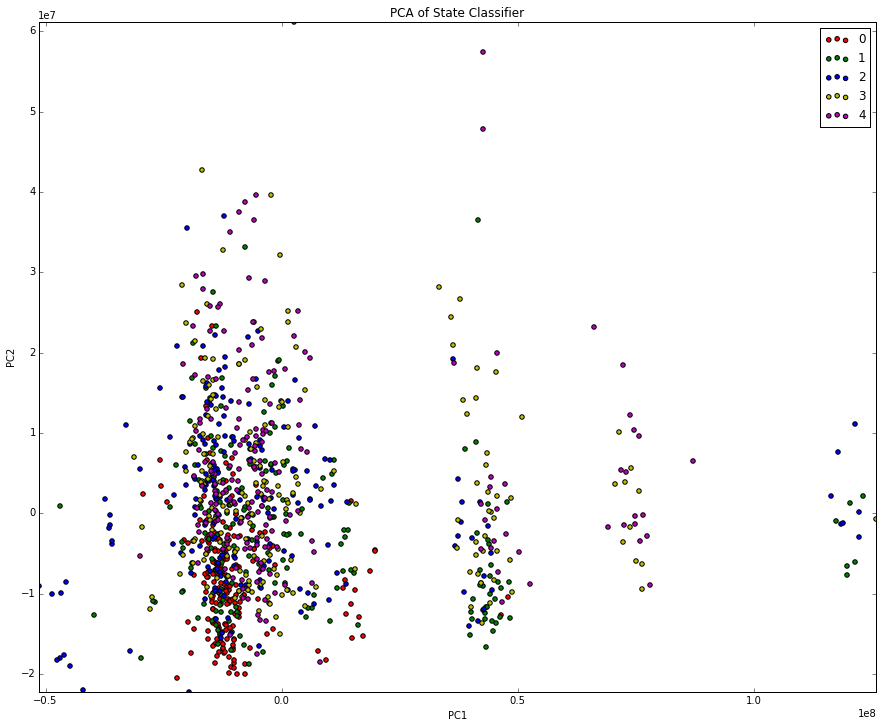

In [73]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( pca_featurespace[:,0].min(), pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( pca_featurespace[:,1].min(), pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
for class_name, color in zip( list(( '0', '1', '2', '3', '4') ), list(('r', 'g', 'b', 'y', 'm')) ):
    indices = np.where( [ gt == class_name for gt in stateB._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = pca_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=class_name)
ax.legend()
ax.set_title('PCA of State Classifier')
fig.show()

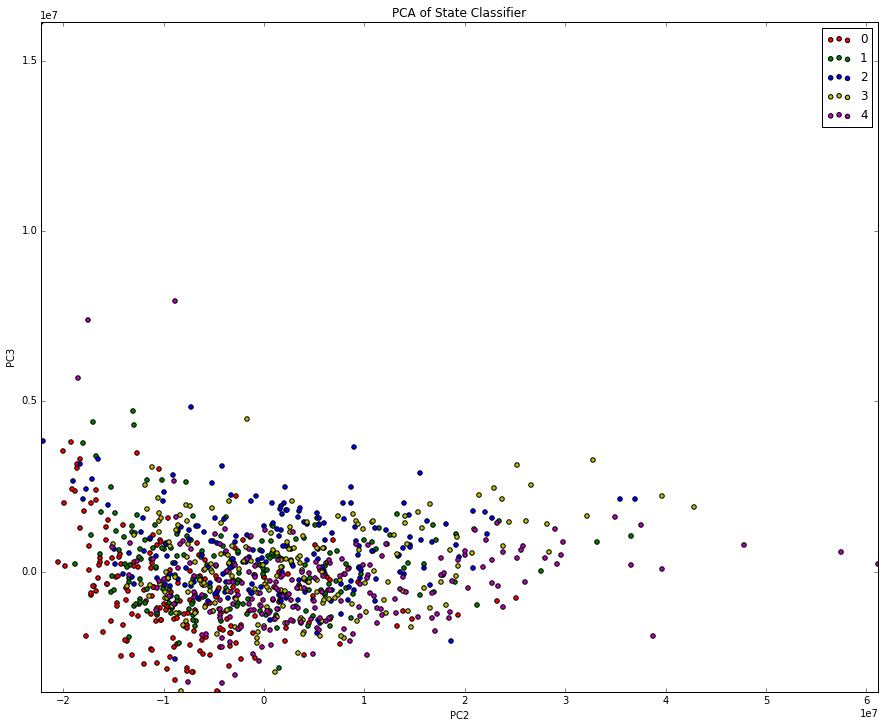

In [89]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( pca_featurespace[:,1].min(), pca_featurespace[:,1].max()  ) )
ax.set_xlabel( 'PC2')
ax.set_ylim( ( pca_featurespace[:,2].min(), pca_featurespace[:,2].max() ) )
ax.set_ylabel( 'PC3')
for class_name, color in zip( list(( '0', '1', '2', '3', '4') ), list(('r', 'g', 'b', 'y', 'm')) ):
    indices = np.where( [ gt == class_name for gt in stateB._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = pca_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 1], class_features[:, 2], c=color, label=class_name)
ax.legend()
ax.set_title('PCA of State Classifier')
fig.show()

In [43]:
stateB._contiguous_ground_truth_labels '0'

False

# LDA analysis of current state classifier

In [54]:
from sklearn.lda import LDA

In [57]:
lda_fitter = LDA(n_components=3)

In [58]:
lda_fitter.fit( stateB.data_matrix, stateB._contiguous_ground_truth_labels )

/usr/local/lib/python2.7/site-packages/sklearn/lda.py:161: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA(n_components=3, priors=None)

In [59]:
lda_featurespace = lda_fitter.transform( stateB.data_matrix )

In [60]:
lda_featurespace.shape

(990, 3)

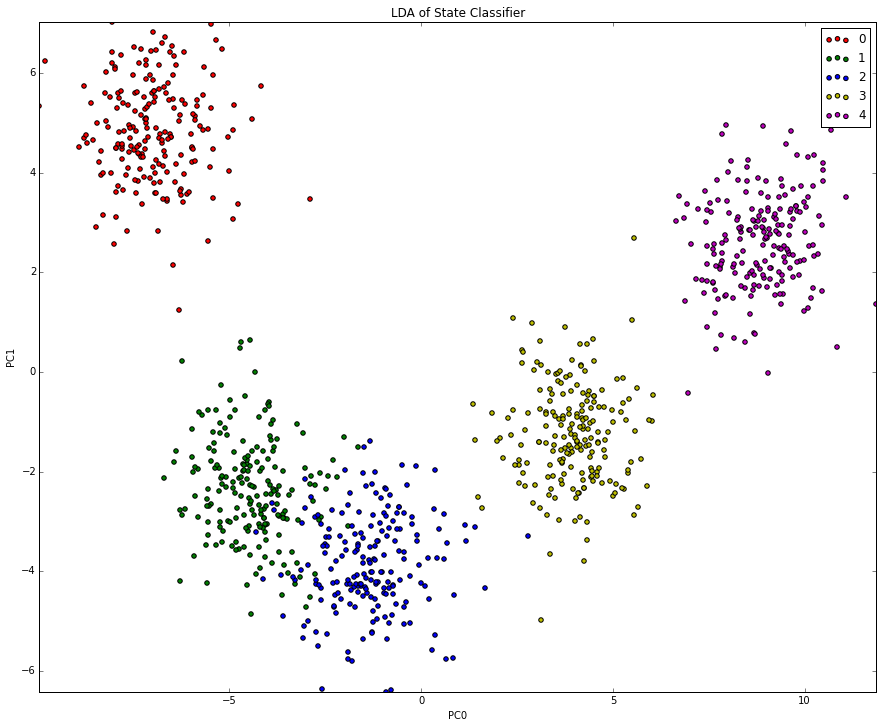

In [63]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( lda_featurespace[:,0].min(), lda_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC0')
ax.set_ylim( ( lda_featurespace[:,1].min(), lda_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC1')
for class_name, color in zip( list(( '0', '1', '2', '3', '4') ), list(('r', 'g', 'b', 'y', 'm')) ):
    indices = np.where( [ gt == class_name for gt in stateB._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = lda_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=class_name)
ax.legend()
ax.set_title('LDA of State Classifier')
fig.show()

# Give data to Jun Ding to reproduce

In [84]:
np.savetxt( 'original_featurespace_990rows_2919cols.tsv', stateB.data_matrix, fmt='%0.5g', delimiter='\t')

In [85]:
with open( 'sample_labels_990rows_1col.tsv', 'w') as out:
    for label in stateB._contiguous_ground_truth_labels:
        out.write( label + '\n')

In [86]:
with open( 'sample_colors_990rows_1col.tsv', 'w') as out:
    for color in list(('red', 'green', 'blue', 'yellow', 'magenta')):
        for i in xrange( 198 ):
            out.write( color + '\n')

# Recalculate features for DME-collected "All days" dataset

Copy data from /Volumes/NIAIRP/LG/ome/dme/April_May2013Pharynx/All/All/DME to lgchrm19 and calculate new features

In [91]:
age = FeatureSpace.NewFromFitFile('Tiffs_all_days/dme_c_elegans_lifeaspan_v3.2features.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE Tiffs_all_days/dme_c_elegans_lifeaspan_v3.2features.fit: <FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit" n_features=2919 n_total_samples=3870 n_samples_per_group=1 n_classes=14 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 589, "06": 316, "07": 405, "08": 354, "09": 171, "10": 201, "11": 143, "12": 406, "13": 71)>


In [92]:
age.feature_set_version

'3.2'

In [140]:
age.Print()

Summary of FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit":
Total samples: 3870 (3870 groups, 1 samples/group)
Total num features: 2919
Feature Set Version: 3.2
	Class 0 "00": 180 samples (180 groups)
	Class 1 "01": 412 samples (412 groups)
	Class 2 "02": 240 samples (240 groups)
	Class 3 "03": 167 samples (167 groups)
	Class 4 "04": 215 samples (215 groups)
	Class 5 "05": 589 samples (589 groups)
	Class 6 "06": 316 samples (316 groups)
	Class 7 "07": 405 samples (405 groups)
	Class 8 "08": 354 samples (354 groups)
	Class 9 "09": 171 samples (171 groups)
	Class 10 "10": 201 samples (201 groups)
	Class 11 "11": 143 samples (143 groups)
	Class 12 "12": 406 samples (406 groups)
	Class 13 "13": 71 samples (71 groups)



# Examine intra-class heterogeneity

In [93]:
age.data_matrix.shape

(3870, 2919)

In [94]:
age.data_list[0].shape

(180, 2919)

In [100]:
day00_pca_fitter = PCA(n_components=5)

In [101]:
day00_pca_fitter.fit( age.data_list[0] )

PCA(copy=True, n_components=5, whiten=False)

In [102]:
day00_pca_fitter.explained_variance_ratio_

array([ 0.5764724 ,  0.37961213,  0.02939672,  0.00947342,  0.00391035])

In [103]:
day00_pca_featurespace = day00_pca_fitter.transform( age.data_list[0] )

In [104]:
day00_pca_featurespace.shape

(180, 5)

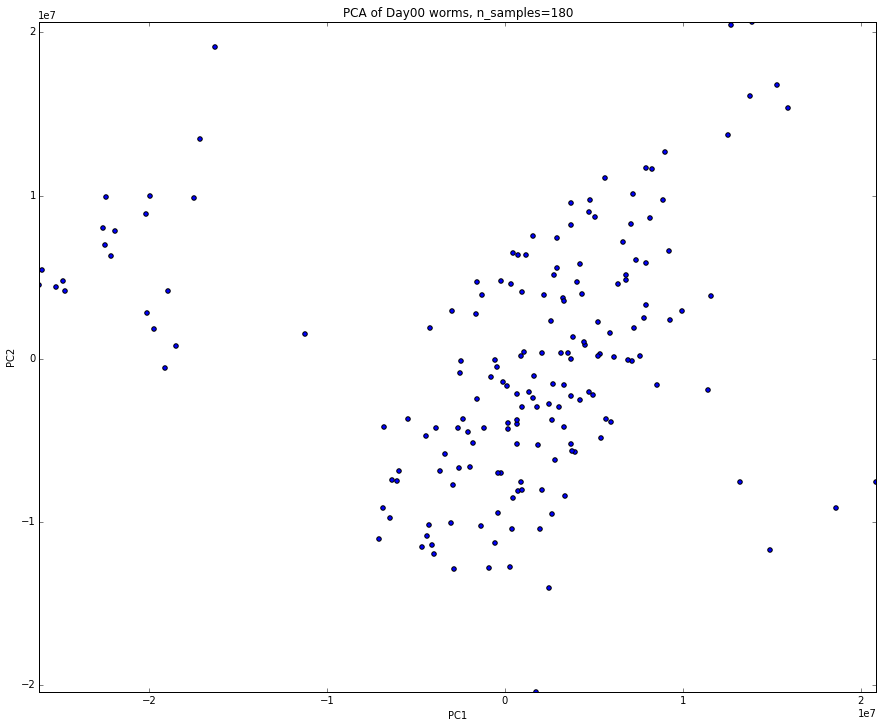

In [123]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day00_pca_featurespace[:,0].min(), day00_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day00_pca_featurespace[:,1].min(), day00_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day00_pca_featurespace[:, 0], day00_pca_featurespace[:, 1], c='b', label='day00')
ax.set_title('PCA of Day00 worms, n_samples={}'.format( age.data_list[0].shape[0] ) )
fig.show()

In [215]:
day01_pca_fitter = PCA(n_components=2)
day01_pca_fitter.fit( age.data_list[1] )
day01_pca_fitter.explained_variance_ratio_

array([ 0.8465623 ,  0.14436351])

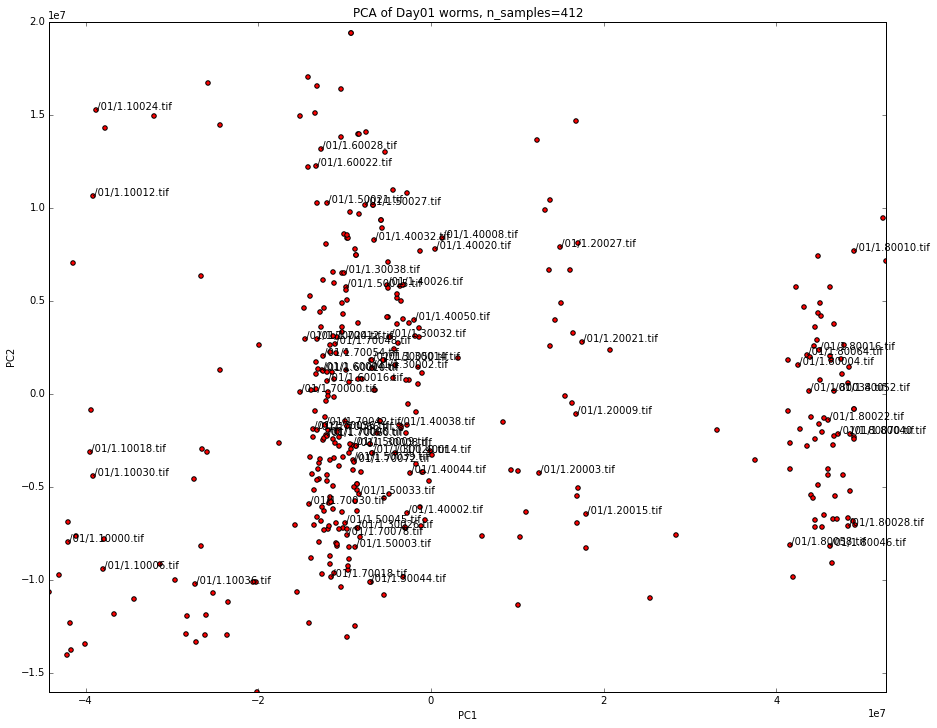

In [221]:
day01_pca_featurespace = day01_pca_fitter.transform( age.data_list[1] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day01_pca_featurespace[:,0].min(), day01_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
#ax.set_ylim( ( day01_pca_featurespace[:,1].min(), day01_pca_featurespace[:,1].max() ) )
ax.set_ylim( ( day01_pca_featurespace[:,1].min(), 2e7 ) )
ax.set_ylabel( 'PC2')
ax.scatter( day01_pca_featurespace[:, 0], day01_pca_featurespace[:, 1], c='r', label='day01')

for i, (xy) in enumerate( zip( day01_pca_featurespace[:, 0], day01_pca_featurespace[:, 1] ) ):
    if i % 6 == 0:
        ax.annotate( age.sample_names[1][i] , xy=xy )

ax.set_title('PCA of Day01 worms, n_samples={}'.format( age.data_list[1].shape[0] ) )
fig.show()

In [110]:
day02_pca_fitter = PCA(n_components=5)
day02_pca_fitter.fit( age.data_list[2] )
day02_pca_fitter.explained_variance_ratio_

array([  8.05504931e-01,   1.71087529e-01,   2.00442028e-02,
         2.36843294e-03,   5.36436751e-04])

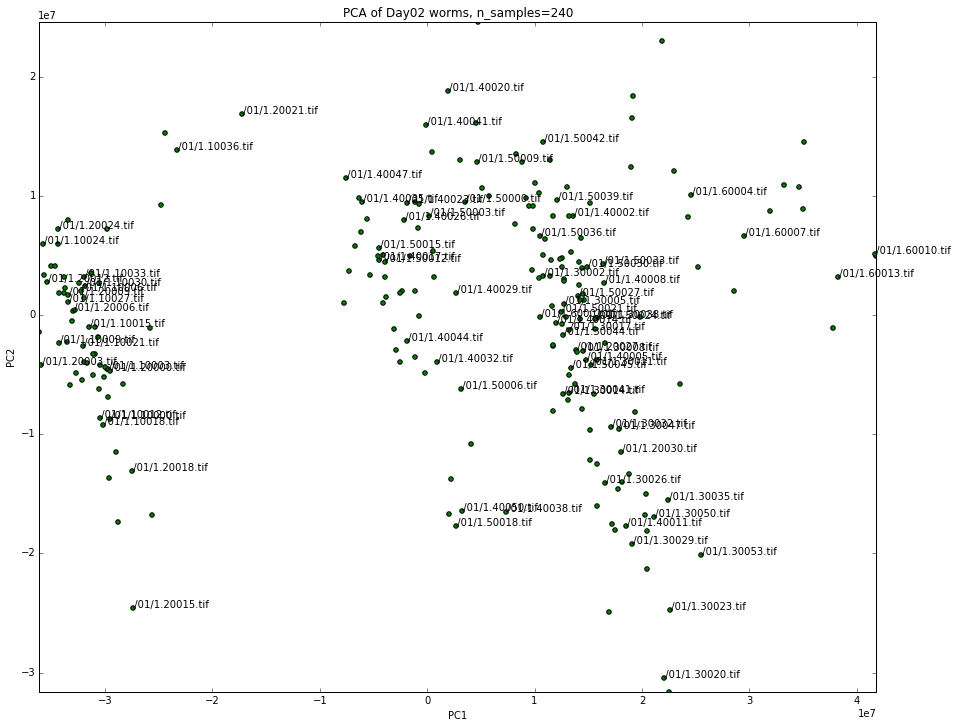

In [223]:
day02_pca_featurespace = day02_pca_fitter.transform( age.data_list[2] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day02_pca_featurespace[:,0].min(), day02_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day02_pca_featurespace[:,1].min(), day02_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day02_pca_featurespace[:, 0], day02_pca_featurespace[:, 1], c='g', label='day02')

for i, (xy) in enumerate( zip( day02_pca_featurespace[:, 0], day02_pca_featurespace[:, 1] ) ):
    if i % 3 == 0:
        ax.annotate( age.sample_names[1][i] , xy=xy )

ax.set_title('PCA of Day02 worms, n_samples={}'.format( age.data_list[2].shape[0] ) )
fig.show()

In [208]:
day03_pca_fitter = PCA(n_components=2)
day03_pca_fitter.fit( age.data_list[3] )
day03_pca_fitter.explained_variance_ratio_

array([ 0.98504349,  0.0140706 ])

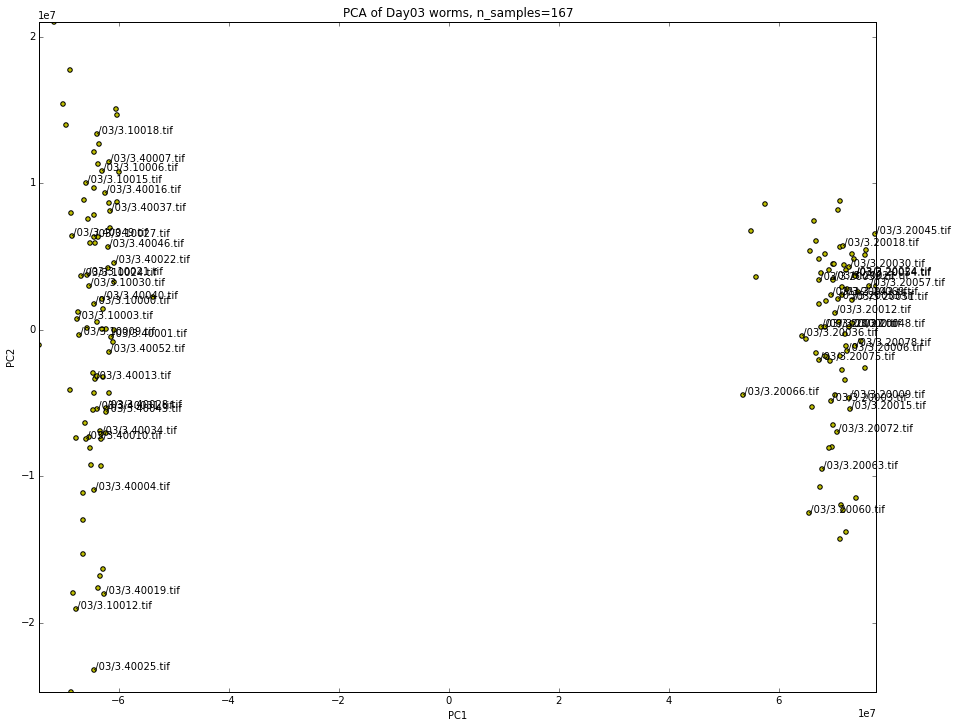

In [213]:
day03_pca_featurespace = day03_pca_fitter.transform( age.data_list[3] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day03_pca_featurespace[:,0].min(), day03_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day03_pca_featurespace[:,1].min(), day03_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day03_pca_featurespace[:, 0], day03_pca_featurespace[:, 1], c='y', label='day03')

for i, (xy) in enumerate( zip( day03_pca_featurespace[:, 0], day03_pca_featurespace[:, 1] ) ):
    label = age.sample_names[3][i]
    #print i, xy, label
    # print only every 4th label
    if i % 3 == 0:
        ax.annotate( label, xy=xy )
ax.set_title('PCA of Day03 worms, n_samples={}'.format( age.data_list[3].shape[0] ) )
fig.show()

In [117]:
day04_pca_fitter = PCA(n_components=4)
day04_pca_fitter.fit( age.data_list[4] )
day04_pca_fitter.explained_variance_ratio_

array([ 0.60699275,  0.37880476,  0.00665188,  0.00321708])

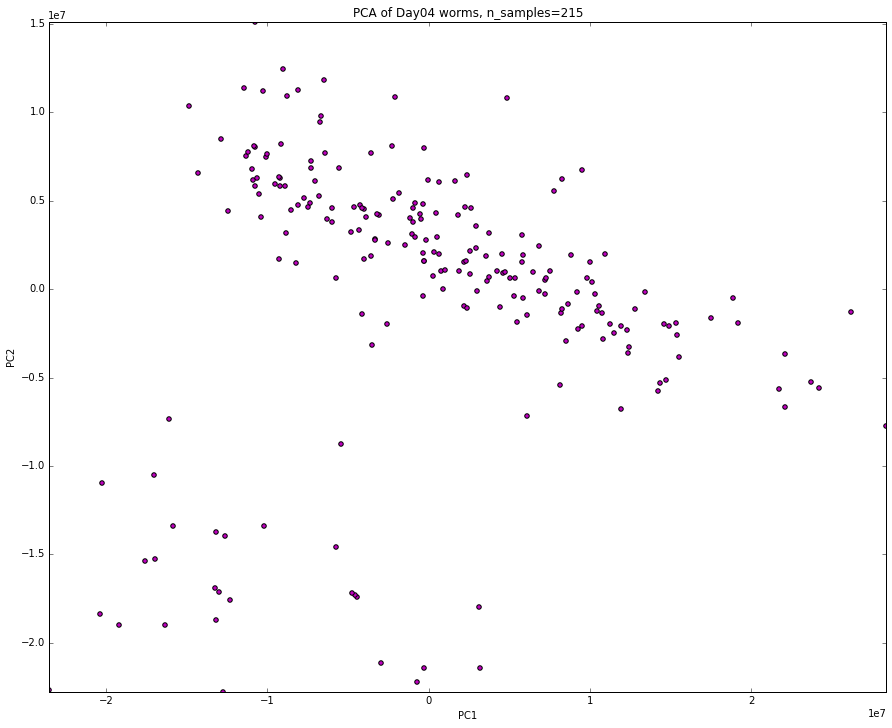

In [127]:
day04_pca_featurespace = day04_pca_fitter.transform( age.data_list[4] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day04_pca_featurespace[:,0].min(), day04_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day04_pca_featurespace[:,1].min(), day04_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day04_pca_featurespace[:, 0], day04_pca_featurespace[:, 1], c='m', label='day04')
ax.set_title('PCA of Day04 worms, n_samples={}'.format( age.data_list[4].shape[0] ) )
fig.show()

In [119]:
day05_pca_fitter = PCA(n_components=3)
day05_pca_fitter.fit( age.data_list[5] )
day05_pca_fitter.explained_variance_ratio_

array([ 0.65580529,  0.33367675,  0.0056897 ])

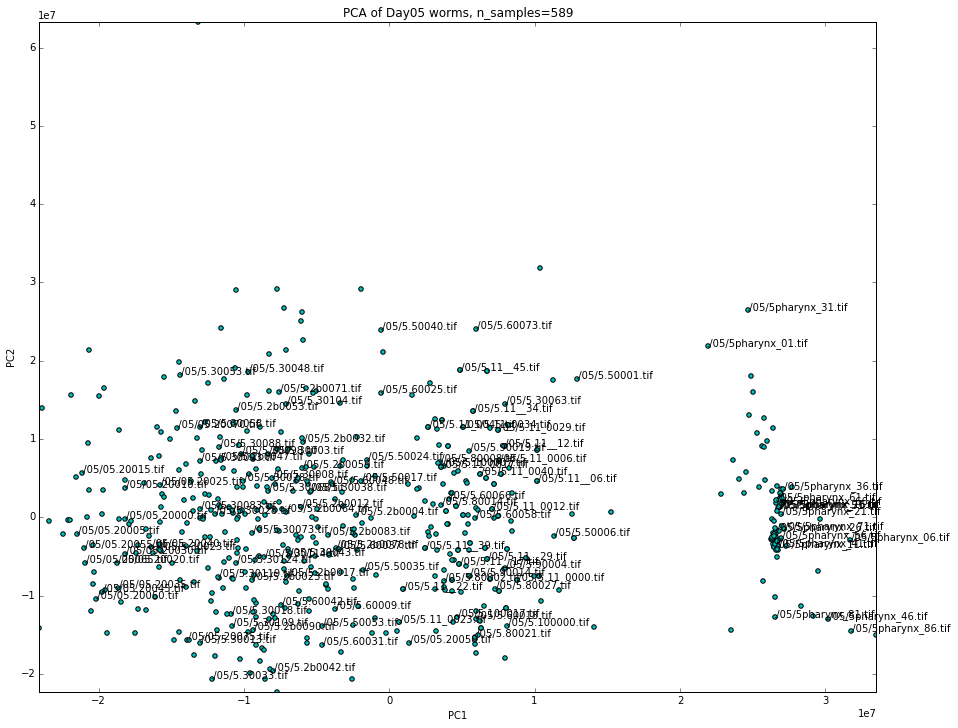

In [214]:
day05_pca_featurespace = day05_pca_fitter.transform( age.data_list[5] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day05_pca_featurespace[:,0].min(), day05_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day05_pca_featurespace[:,1].min(), day05_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day05_pca_featurespace[:, 0], day05_pca_featurespace[:, 1], c='c', label='day05')

for i, (xy) in enumerate( zip( day05_pca_featurespace[:, 0], day05_pca_featurespace[:, 1] ) ):
    if i % 5 == 0:
        ax.annotate( age.sample_names[5][i] , xy=xy )

ax.set_title('PCA of Day05 worms, n_samples={}'.format( age.data_list[5].shape[0] ) )
fig.show()

In [133]:
day06_pca_fitter = PCA(n_components=3)
day06_pca_fitter.fit( age.data_list[6] )
day06_pca_fitter.explained_variance_ratio_

array([ 0.5982003 ,  0.38995011,  0.00578523])

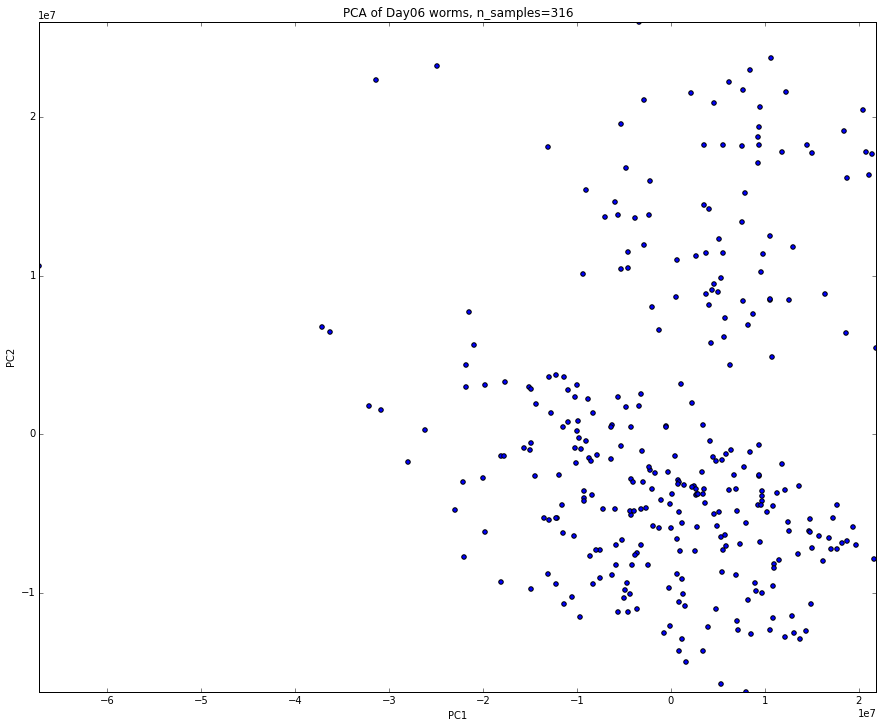

In [134]:
day06_pca_featurespace = day06_pca_fitter.transform( age.data_list[6] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day06_pca_featurespace[:,0].min(), day06_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day06_pca_featurespace[:,1].min(), day06_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day06_pca_featurespace[:, 0], day06_pca_featurespace[:, 1], c='b', label='day06')
ax.set_title('PCA of Day06 worms, n_samples={}'.format( age.data_list[6].shape[0] ) )
fig.show()

In [135]:
day07_pca_fitter = PCA(n_components=3)
day07_pca_fitter.fit( age.data_list[7] )
day07_pca_fitter.explained_variance_ratio_

array([ 0.78202364,  0.2080329 ,  0.00567319])

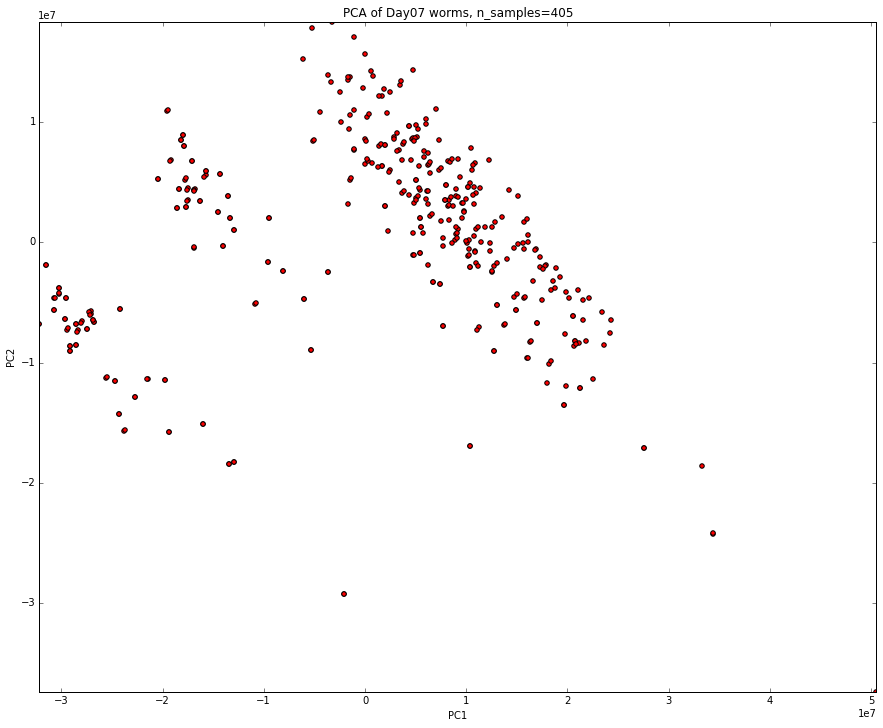

In [136]:
day07_pca_featurespace = day07_pca_fitter.transform( age.data_list[7] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day07_pca_featurespace[:,0].min(), day07_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day07_pca_featurespace[:,1].min(), day07_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day07_pca_featurespace[:, 0], day07_pca_featurespace[:, 1], c='r', label='day07')
ax.set_title('PCA of Day07 worms, n_samples={}'.format( age.data_list[7].shape[0] ) )
fig.show()

In [132]:
day08_pca_fitter = PCA(n_components=3)
day08_pca_fitter.fit( age.data_list[8] )
day08_pca_fitter.explained_variance_ratio_

array([ 0.81922281,  0.17596564,  0.00216606])

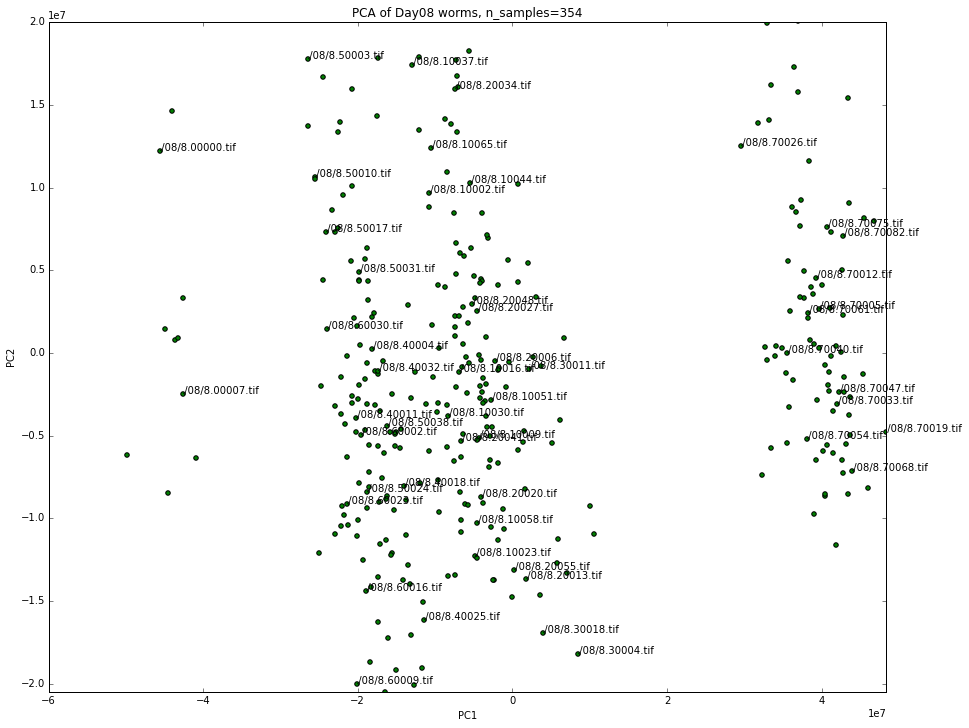

In [227]:
day08_pca_featurespace = day08_pca_fitter.transform( age.data_list[8] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day08_pca_featurespace[:,0].min(), day08_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
#ax.set_ylim( ( day08_pca_featurespace[:,1].min(), day08_pca_featurespace[:,1].max() ) )
ax.set_ylim( ( day08_pca_featurespace[:,1].min(), 2e7 ) )
ax.set_ylabel( 'PC2')
ax.scatter( day08_pca_featurespace[:, 0], day08_pca_featurespace[:, 1], c='g', label='day08')
for i, (xy) in enumerate( zip( day08_pca_featurespace[:, 0], day08_pca_featurespace[:, 1] ) ):
    if i % 7 == 0:
        ax.annotate( age.sample_names[8][i] , xy=xy )
ax.set_title('PCA of Day08 worms, n_samples={}'.format( age.data_list[8].shape[0] ) )
fig.show()

In [138]:
day09_pca_fitter = PCA(n_components=3)
day09_pca_fitter.fit( age.data_list[9] )
day09_pca_fitter.explained_variance_ratio_

array([ 0.87371752,  0.09787376,  0.01674496])

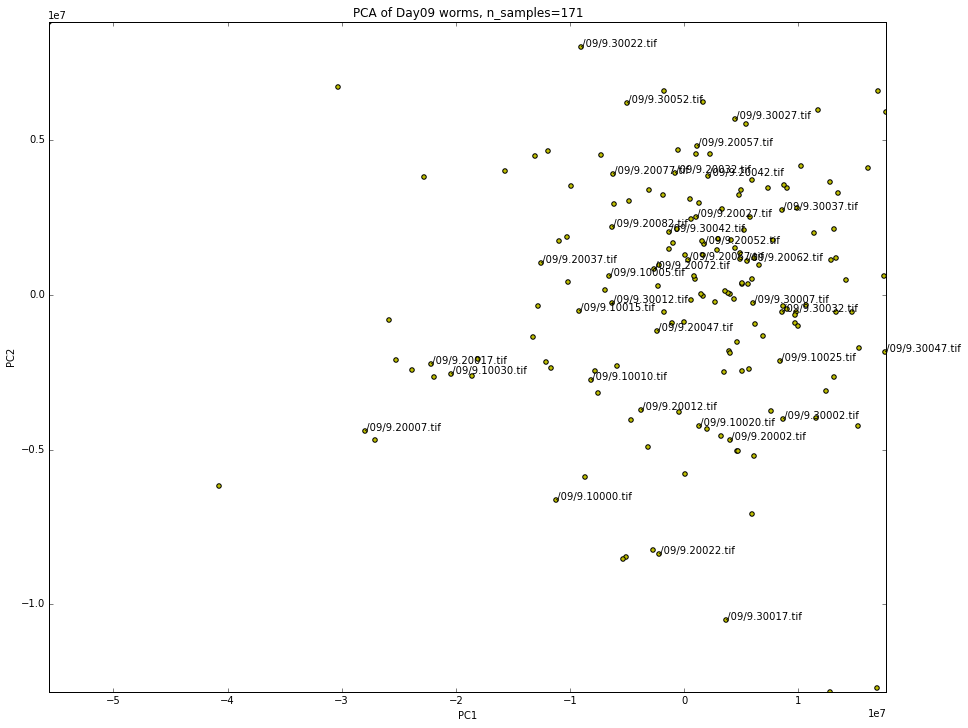

In [275]:
day09_pca_featurespace = day09_pca_fitter.transform( age.data_list[9] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day09_pca_featurespace[:,0].min(), day09_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day09_pca_featurespace[:,1].min(), day09_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day09_pca_featurespace[:, 0], day09_pca_featurespace[:, 1], c='y', label='day09')
for i, (xy) in enumerate( zip( day09_pca_featurespace[:, 0], day09_pca_featurespace[:, 1] ) ):
    if i % 5 == 0:
        ax.annotate( age.sample_names[9][i] , xy=xy )
ax.set_title('PCA of Day09 worms, n_samples={}'.format( age.data_list[9].shape[0] ) )
fig.show()

In [141]:
day10_pca_fitter = PCA(n_components=3)
day10_pca_fitter.fit( age.data_list[10] )
day10_pca_fitter.explained_variance_ratio_

array([ 0.57305526,  0.41209148,  0.00747927])

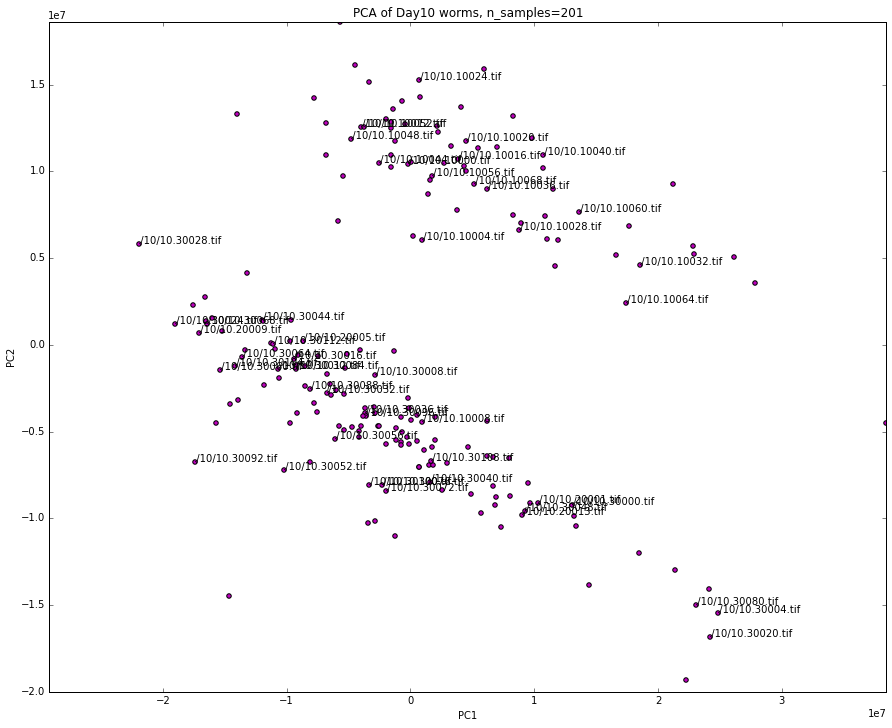

In [238]:
day10_pca_featurespace = day10_pca_fitter.transform( age.data_list[10] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day10_pca_featurespace[:,0].min(), day10_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
#ax.set_ylim( ( day10_pca_featurespace[:,1].min(), day10_pca_featurespace[:,1].max() ) )
ax.set_ylim( ( -2e7, day10_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day10_pca_featurespace[:, 0], day10_pca_featurespace[:, 1], c='m', label='day10')
for i, (xy) in enumerate( zip( day10_pca_featurespace[:, 0], day10_pca_featurespace[:, 1] ) ):
    if i % 4 == 0:
        ax.annotate( age.sample_names[10][i] , xy=xy )
ax.set_title('PCA of Day10 worms, n_samples={}'.format( age.data_list[10].shape[0] ) )
fig.show()

In [143]:
day11_pca_fitter = PCA(n_components=3)
day11_pca_fitter.fit( age.data_list[11] )
day11_pca_fitter.explained_variance_ratio_

array([ 0.93425244,  0.04664065,  0.01156373])

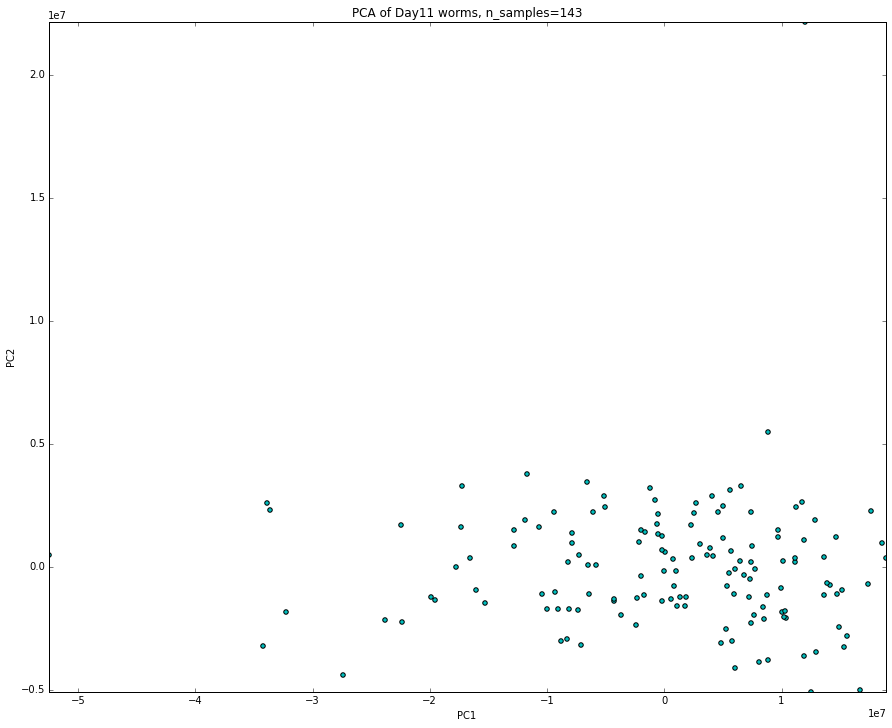

In [144]:
day11_pca_featurespace = day11_pca_fitter.transform( age.data_list[11] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day11_pca_featurespace[:,0].min(), day11_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day11_pca_featurespace[:,1].min(), day11_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day11_pca_featurespace[:, 0], day11_pca_featurespace[:, 1], c='c', label='day11')
ax.set_title('PCA of Day11 worms, n_samples={}'.format( age.data_list[11].shape[0] ) )
fig.show()

In [145]:
day12_pca_fitter = PCA(n_components=3)
day12_pca_fitter.fit( age.data_list[12] )
day12_pca_fitter.explained_variance_ratio_

array([ 0.73089456,  0.25320601,  0.00893336])

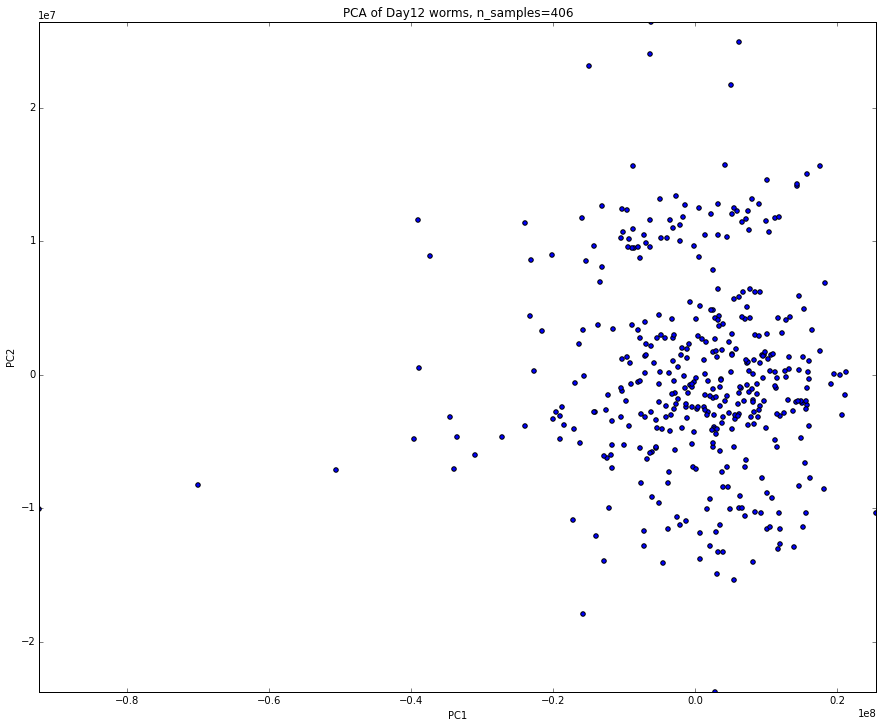

In [146]:
day12_pca_featurespace = day12_pca_fitter.transform( age.data_list[12] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day12_pca_featurespace[:,0].min(), day12_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day12_pca_featurespace[:,1].min(), day12_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day12_pca_featurespace[:, 0], day12_pca_featurespace[:, 1], c='b', label='day12')
ax.set_title('PCA of Day12 worms, n_samples={}'.format( age.data_list[12].shape[0] ) )
fig.show()

In [147]:
day13_pca_fitter = PCA(n_components=3)
day13_pca_fitter.fit( age.data_list[13] )
day13_pca_fitter.explained_variance_ratio_

array([ 0.79692406,  0.12971031,  0.04506541])

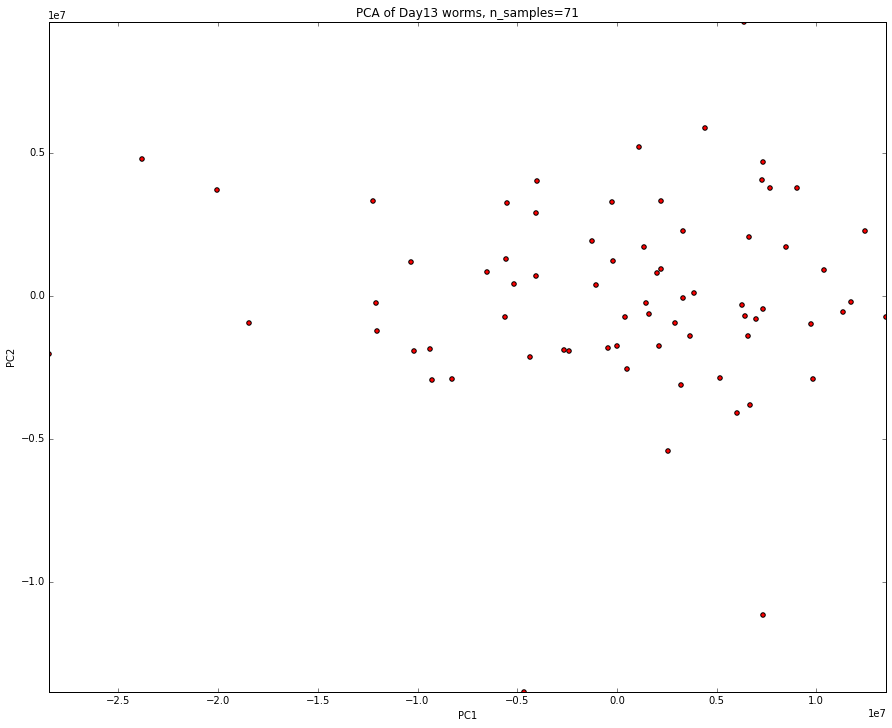

In [148]:
day13_pca_featurespace = day13_pca_fitter.transform( age.data_list[13] )
fig, ax = plt.subplots(figsize=(15,12))
ax.set_xlim( ( day13_pca_featurespace[:,0].min(), day13_pca_featurespace[:,0].max()  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( day13_pca_featurespace[:,1].min(), day13_pca_featurespace[:,1].max() ) )
ax.set_ylabel( 'PC2')
ax.scatter( day13_pca_featurespace[:, 0], day13_pca_featurespace[:, 1], c='r', label='day13')
ax.set_title('PCA of Day13 worms, n_samples={}'.format( age.data_list[13].shape[0] ) )
fig.show()

# All samples together PCA

In [149]:
all_pca_fitter = PCA(n_components=5)
all_pca_fitter.fit( age.data_matrix )
all_pca_fitter.explained_variance_ratio_

array([  8.53053844e-01,   1.41730299e-01,   2.70787381e-03,
         1.62289922e-03,   5.09433252e-04])

In [150]:
all_pca_featurespace = all_pca_fitter.transform( age.data_matrix )

In [151]:
class_values = range(14)
class_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [165]:
age.class_names

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13']

In [166]:
class_labels = age.class_names

In [200]:
class_colors = plt.cm.jet( [ float(val)/13 for val in class_values] )
class_colors

array([[ 0.        ,  0.        ,  0.5       ,  1.        ],
       [ 0.        ,  0.        ,  0.83868093,  1.        ],
       [ 0.        ,  0.11176471,  1.        ,  1.        ],
       [ 0.        ,  0.4254902 ,  1.        ,  1.        ],
       [ 0.        ,  0.72352941,  1.        ,  1.        ],
       [ 0.11068944,  1.        ,  0.8570525 ,  1.        ],
       [ 0.36369386,  1.        ,  0.60404807,  1.        ],
       [ 0.60404807,  1.        ,  0.36369386,  1.        ],
       [ 0.8570525 ,  1.        ,  0.11068944,  1.        ],
       [ 1.        ,  0.79956427,  0.        ,  1.        ],
       [ 1.        ,  0.52360203,  0.        ,  1.        ],
       [ 1.        ,  0.23311547,  0.        ,  1.        ],
       [ 0.83868093,  0.        ,  0.        ,  1.        ],
       [ 0.5       ,  0.        ,  0.        ,  1.        ]])

In [201]:
class_shapes = list(('o','v','^','<','>','s','p','*','h','H','8','D','d'))
print len(class_shapes)

13


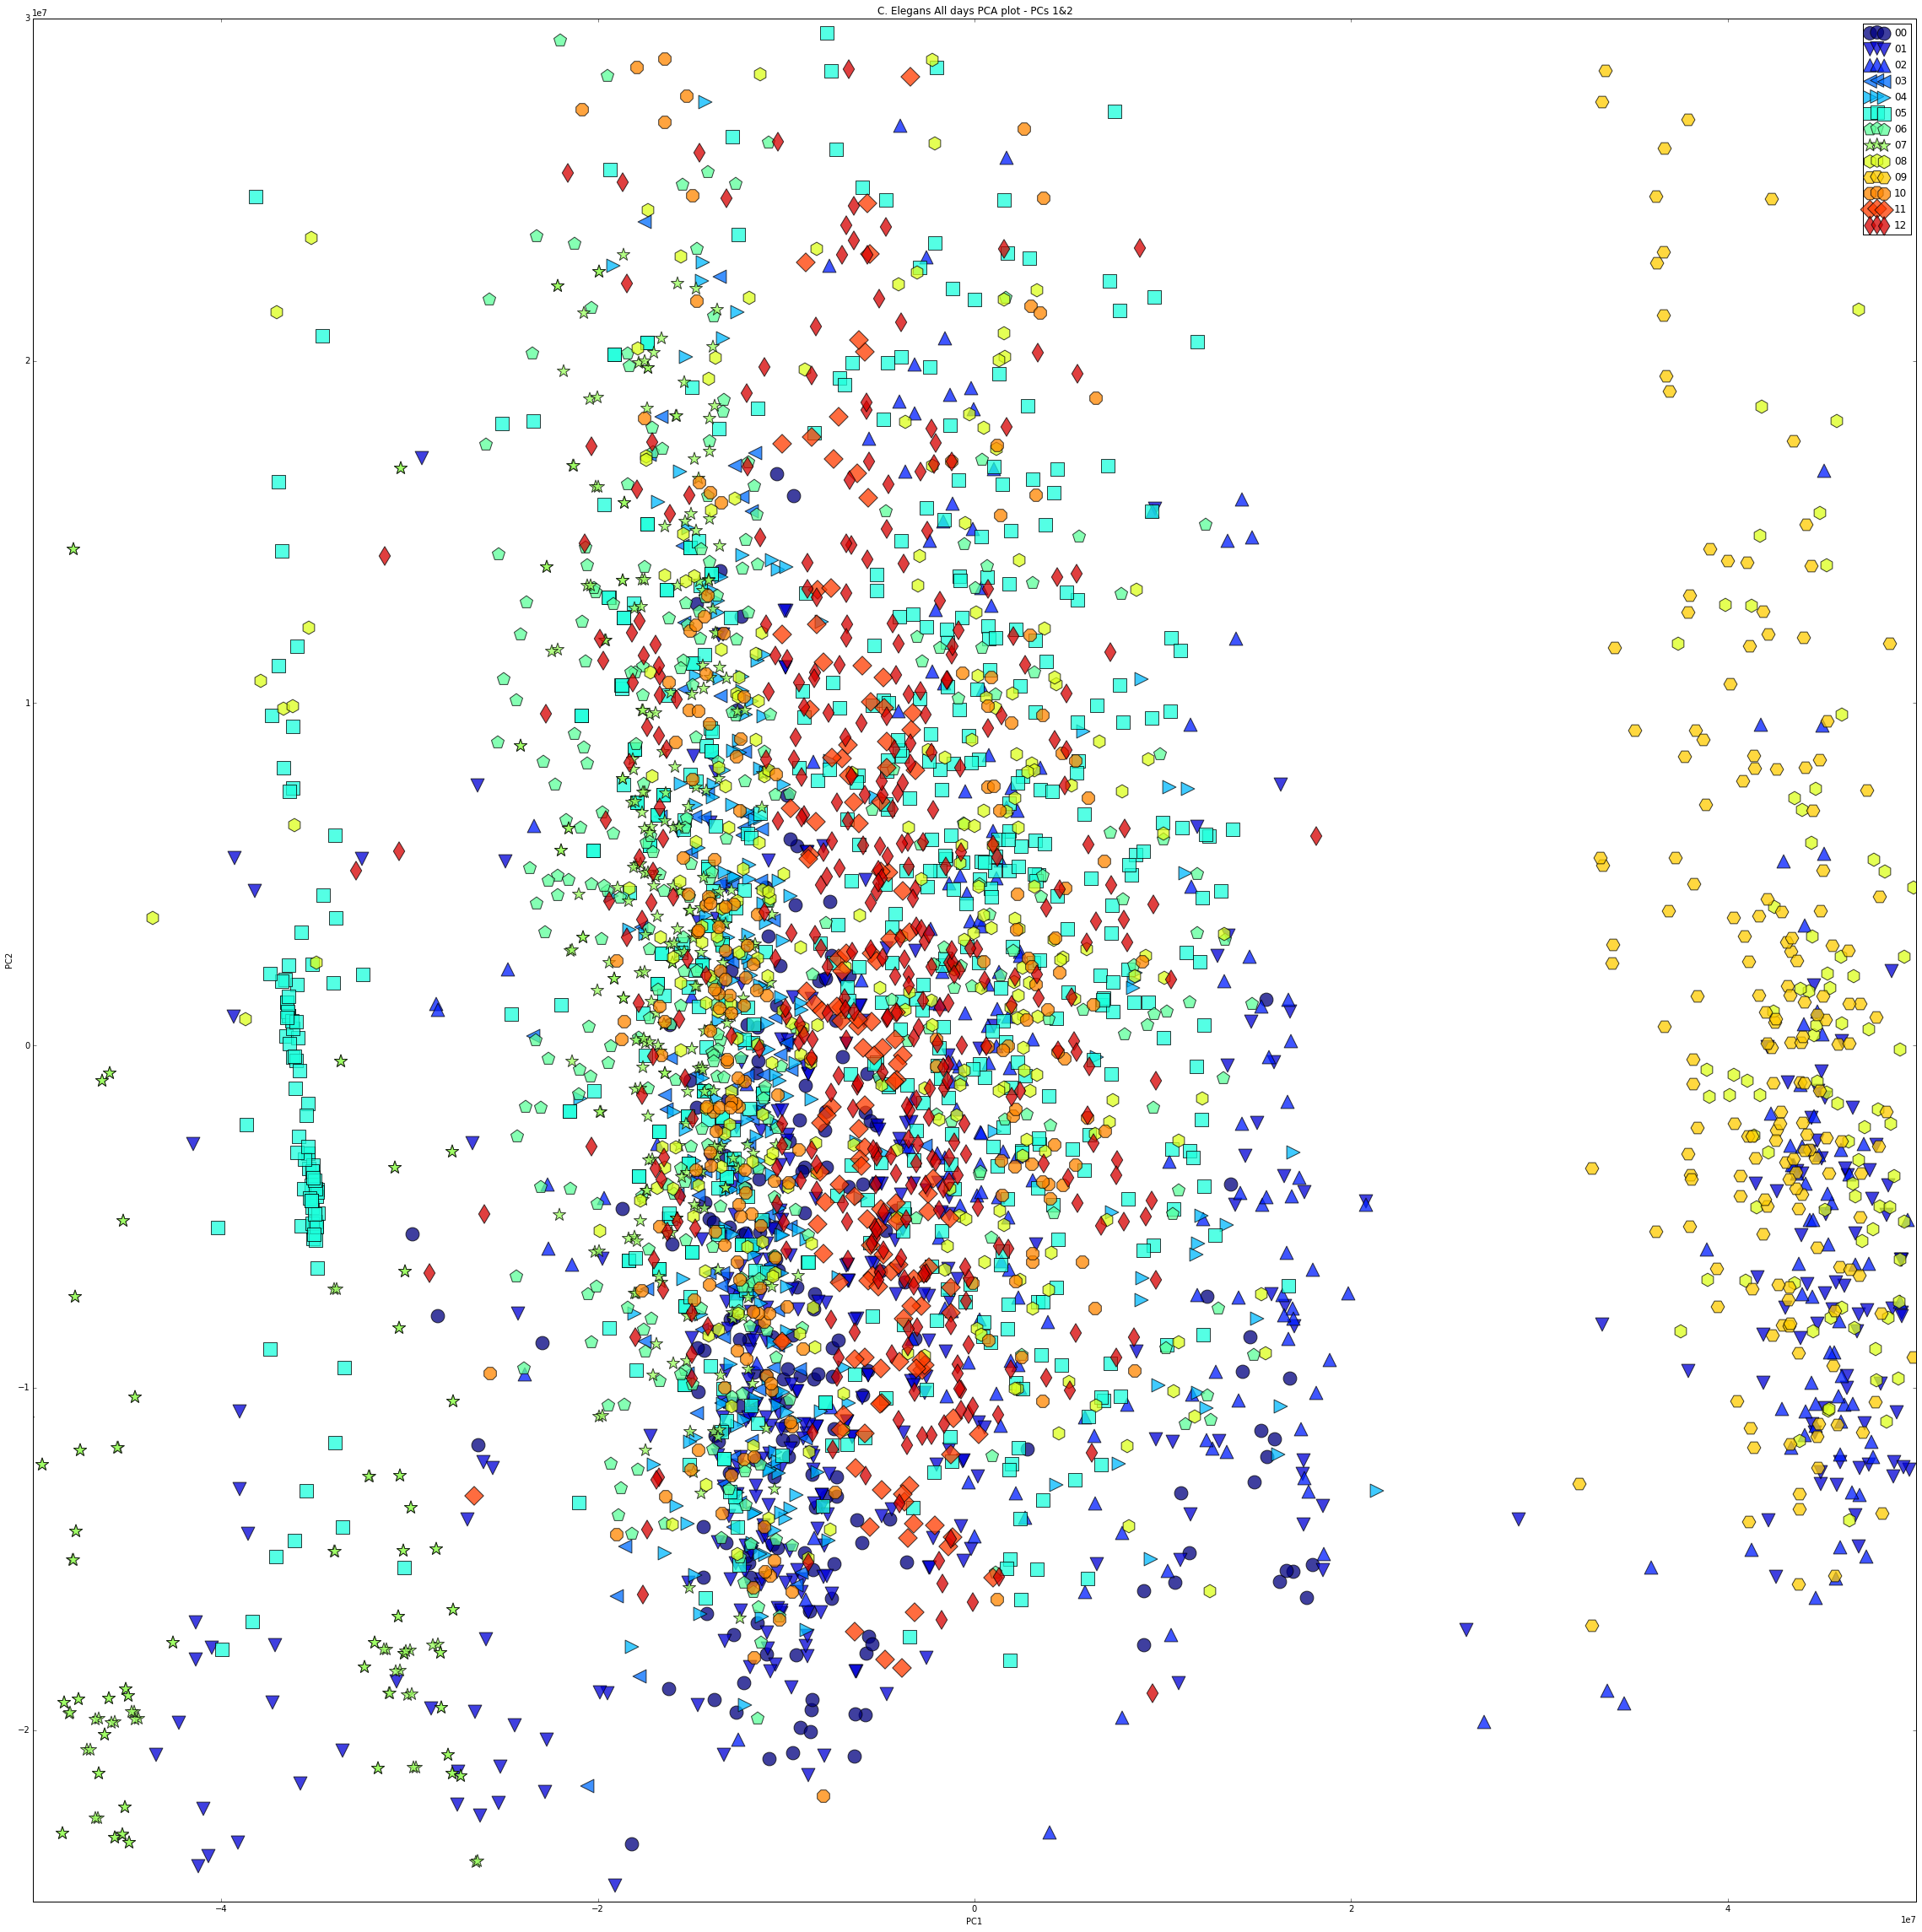

In [202]:
fig, ax = plt.subplots(figsize=(40,40))
ax.set_xlim( ( -5e7, 5e7  ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( -2.5e7, 3e7) )
ax.set_ylabel( 'PC2')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_pca_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=label, marker=shape, s=250, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days PCA plot - PCs 1&2')
fig.show()

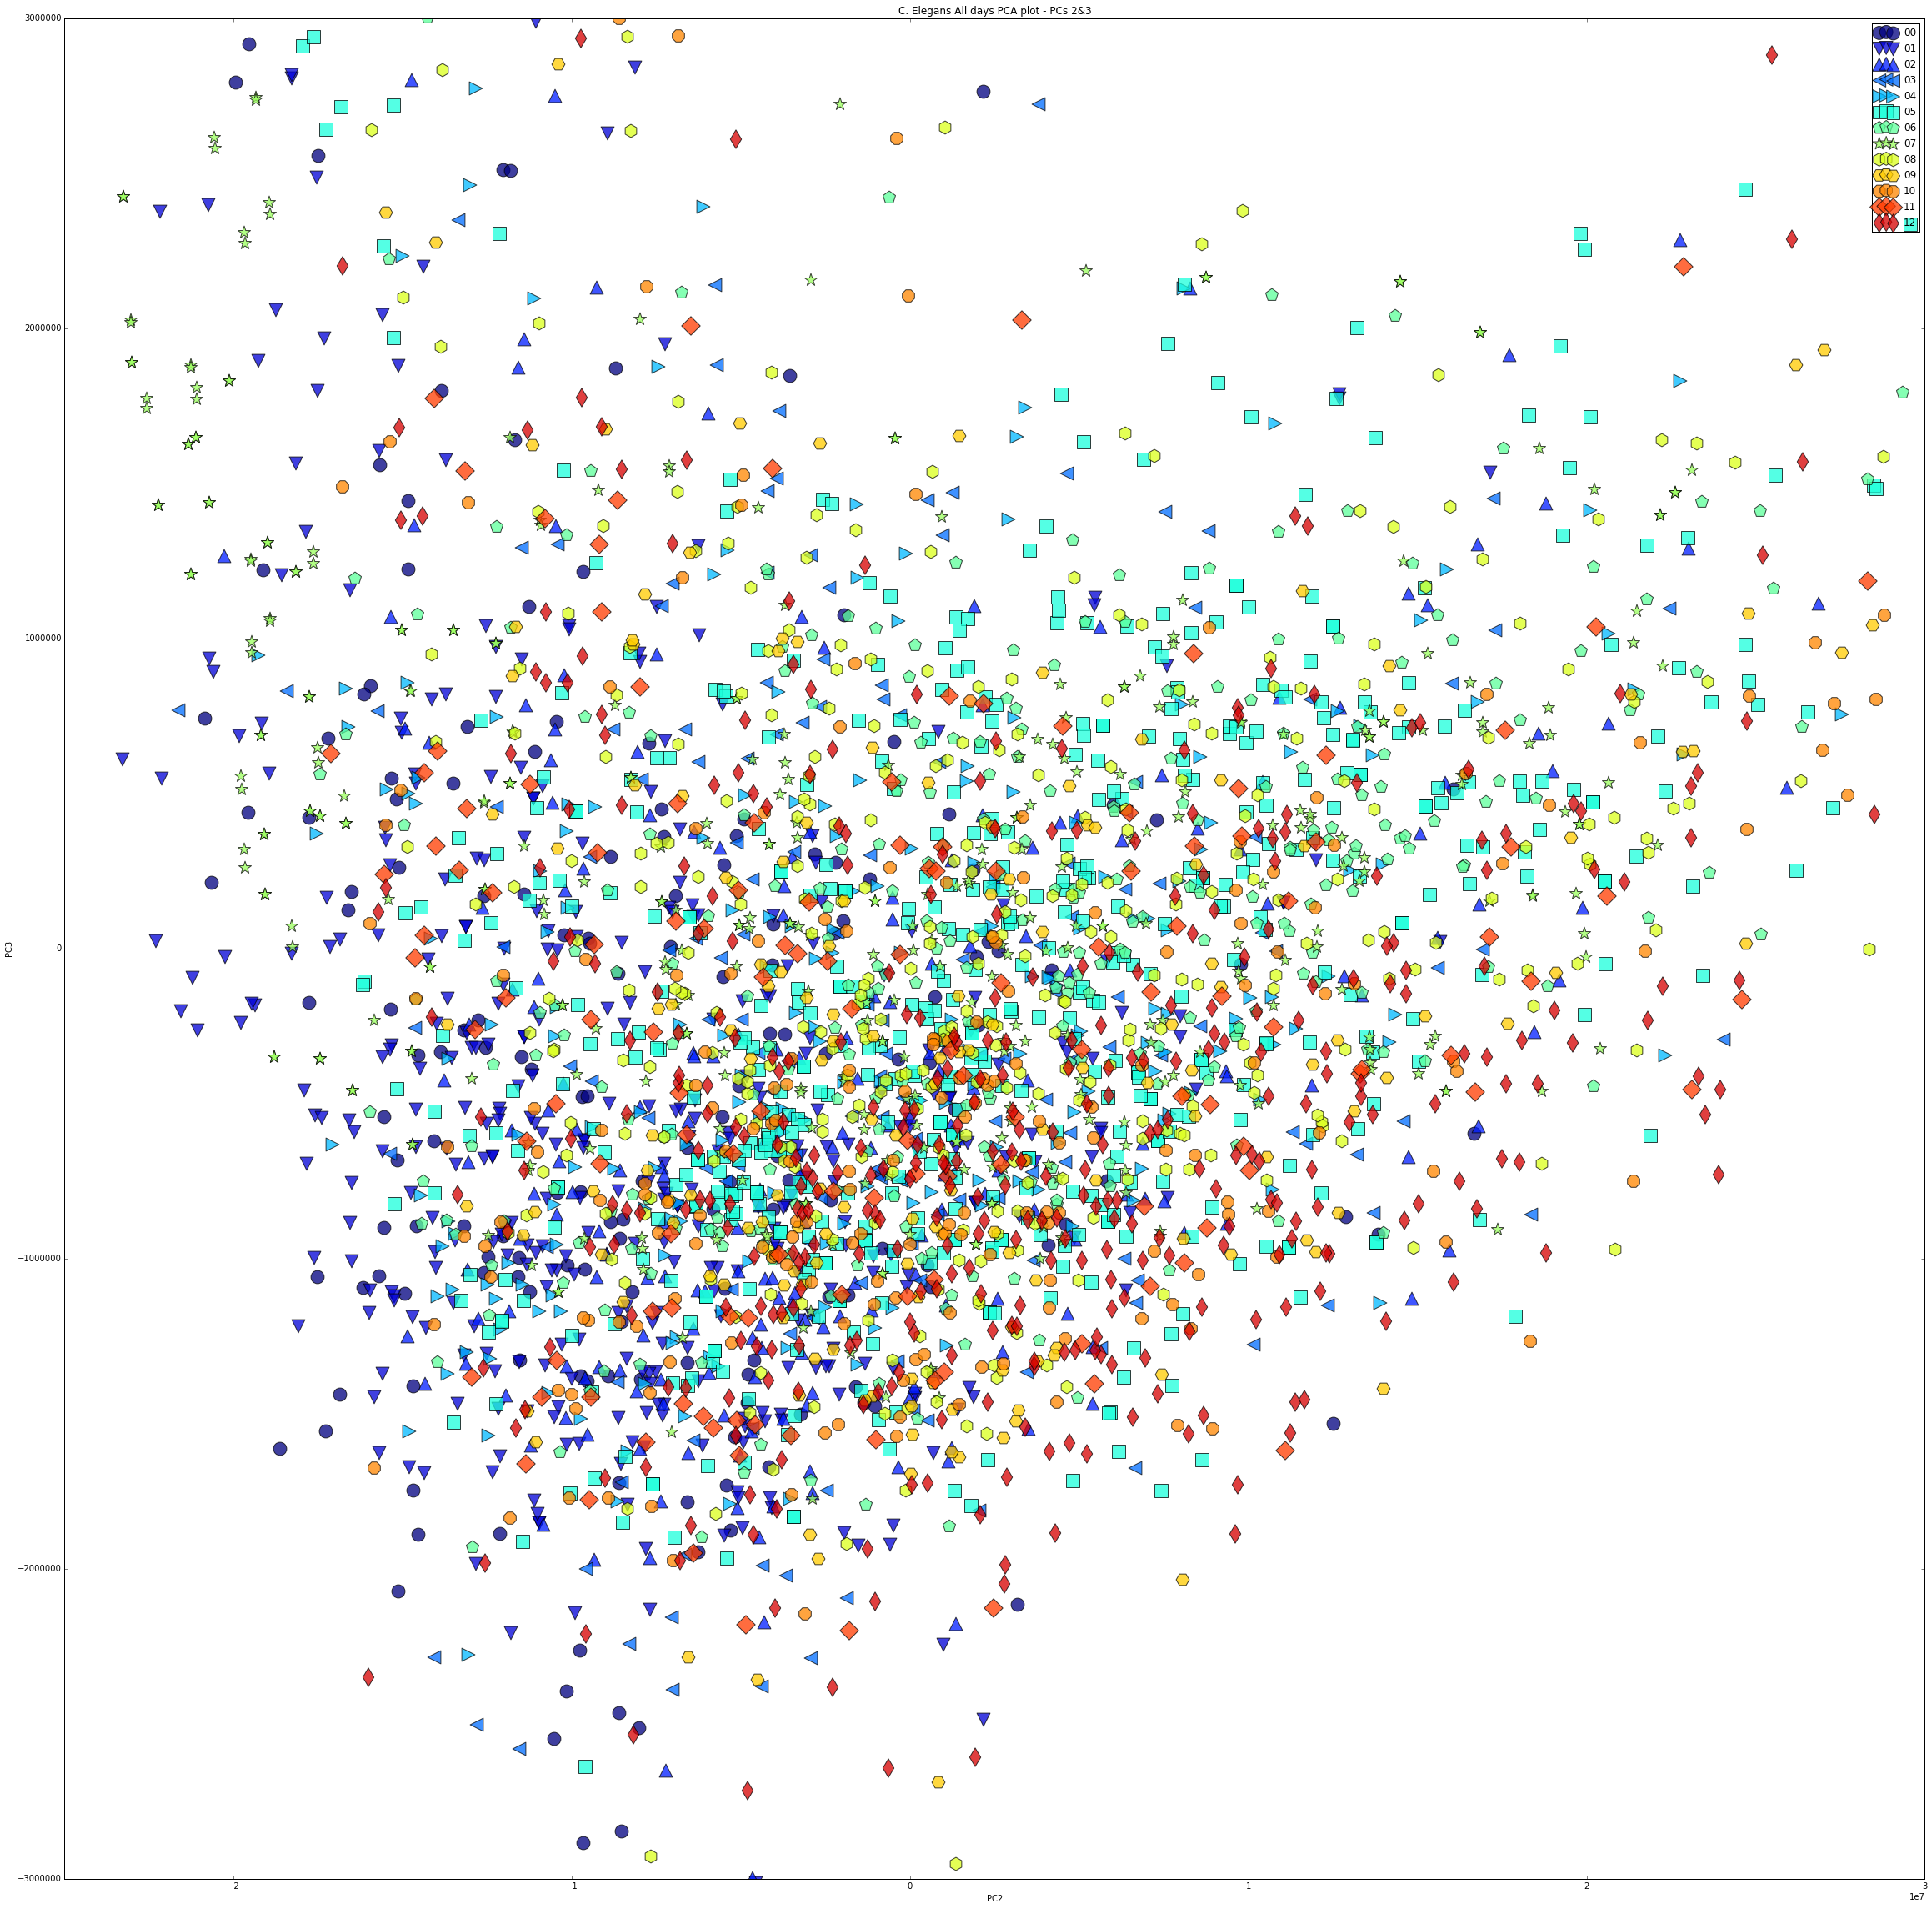

In [203]:
fig, ax = plt.subplots(figsize=(40,40))
ax.set_xlim( ( -2.5e7, 3e7  ) )
ax.set_xlabel( 'PC2')
ax.set_ylim( ( -0.3e7, 0.3e7) )
ax.set_ylabel( 'PC3')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_pca_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 1], class_features[:, 2], c=color, label=label, marker=shape, s=250, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days PCA plot - PCs 2&3')
fig.show()

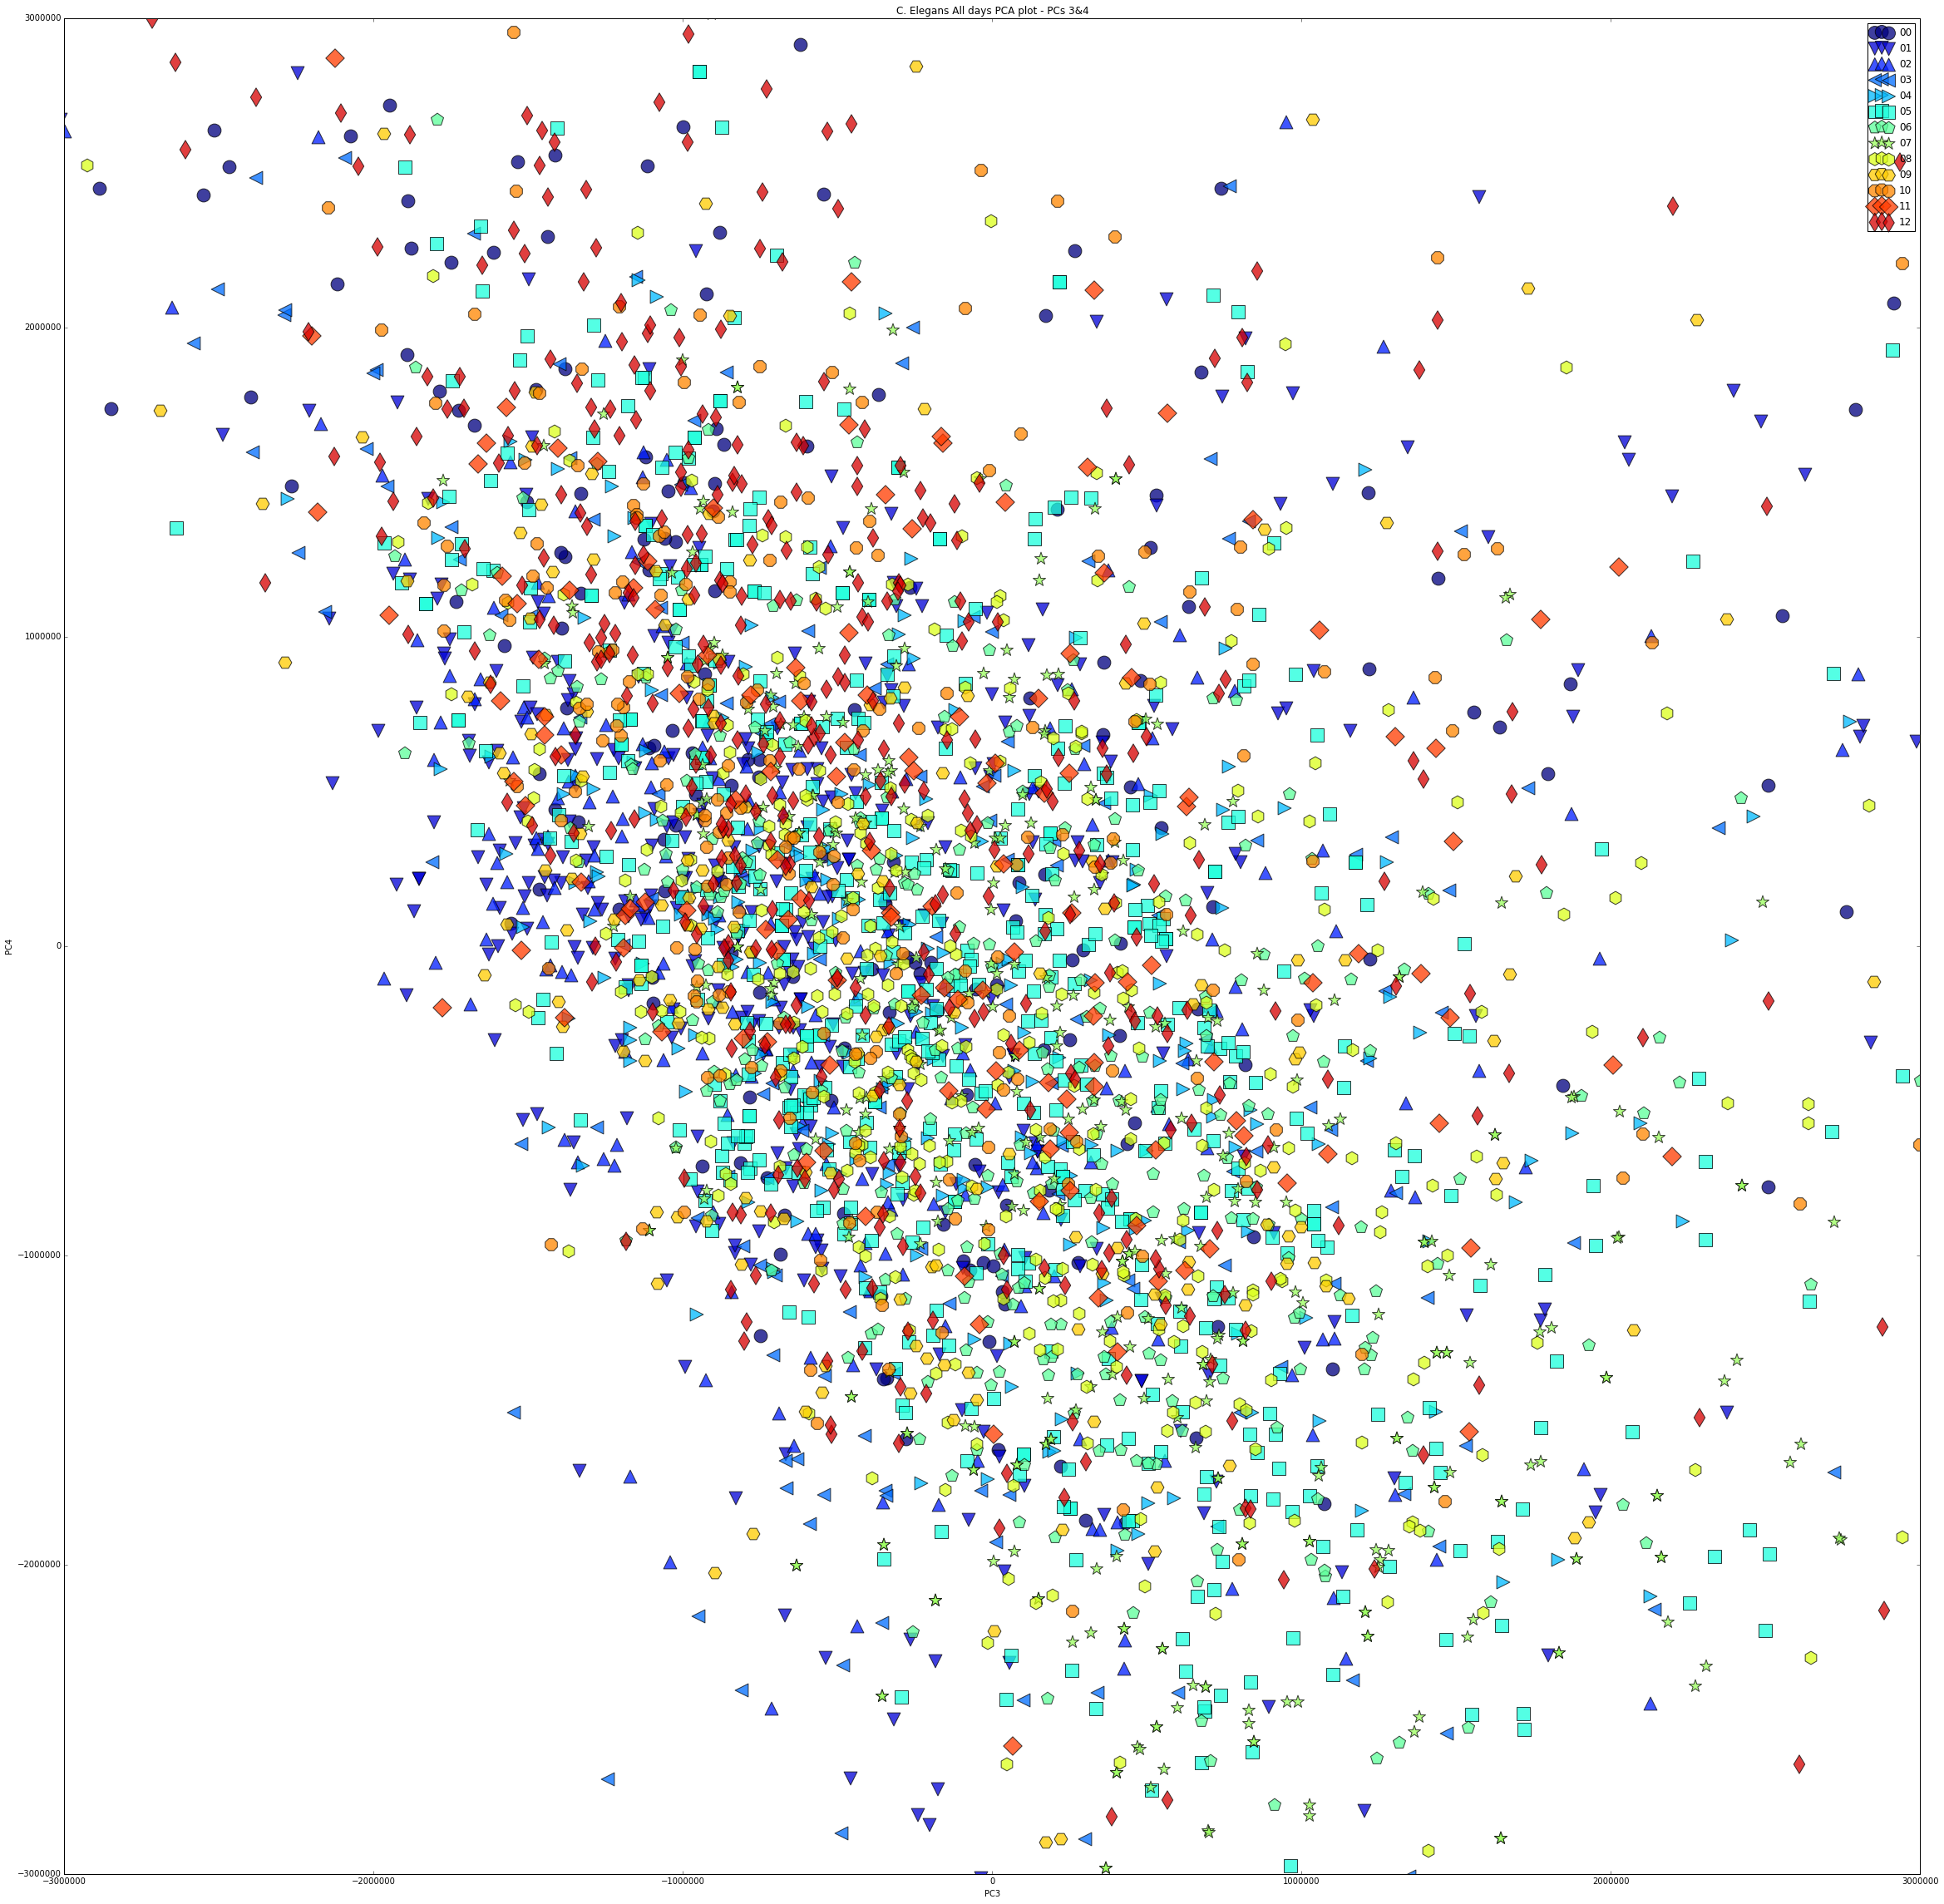

In [207]:
fig, ax = plt.subplots(figsize=(40,40))
ax.set_xlim( ( -0.3e7, 0.3e7) )
ax.set_xlabel( 'PC3')
ax.set_ylim( ( -0.3e7, 0.3e7) )
ax.set_ylabel( 'PC4')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_pca_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 2], class_features[:, 3], c=color, label=label, marker=shape, s=250, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days PCA plot - PCs 3&4')
fig.show()

# All Samples Together LDA

In [250]:
all_lda_fitter = LDA()
all_lda_fitter.fit( age.data_matrix, age._contiguous_ground_truth_labels )
all_lda_featurespace = all_lda_fitter.transform( age.data_matrix )

In [251]:
all_lda_fitter.priors_

array([ 0.04651163,  0.10645995,  0.0620155 ,  0.04315245,  0.05555556,
        0.15219638,  0.08165375,  0.10465116,  0.09147287,  0.04418605,
        0.05193798,  0.0369509 ,  0.10490956,  0.01834625])

In [252]:
all_lda_featurespace.shape

(3870, 3)

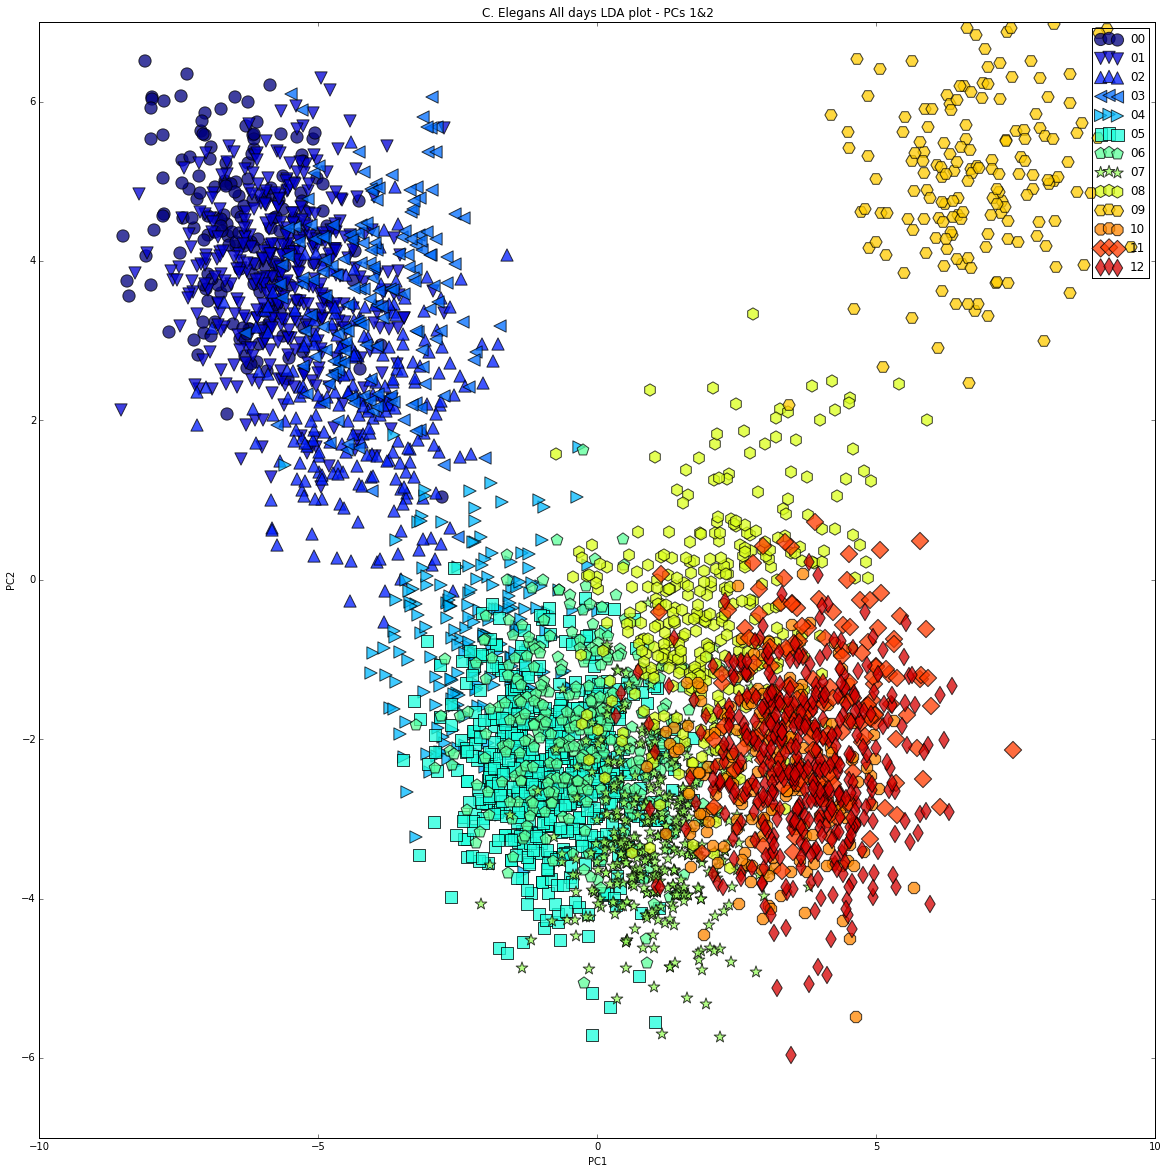

In [255]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim( ( -10, 10 ) )
ax.set_xlabel( 'PC1')
ax.set_ylim( ( -7, 7 ))
ax.set_ylabel( 'PC2')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_lda_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=label, marker=shape, s=150, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days LDA plot - PCs 1&2')
fig.show()

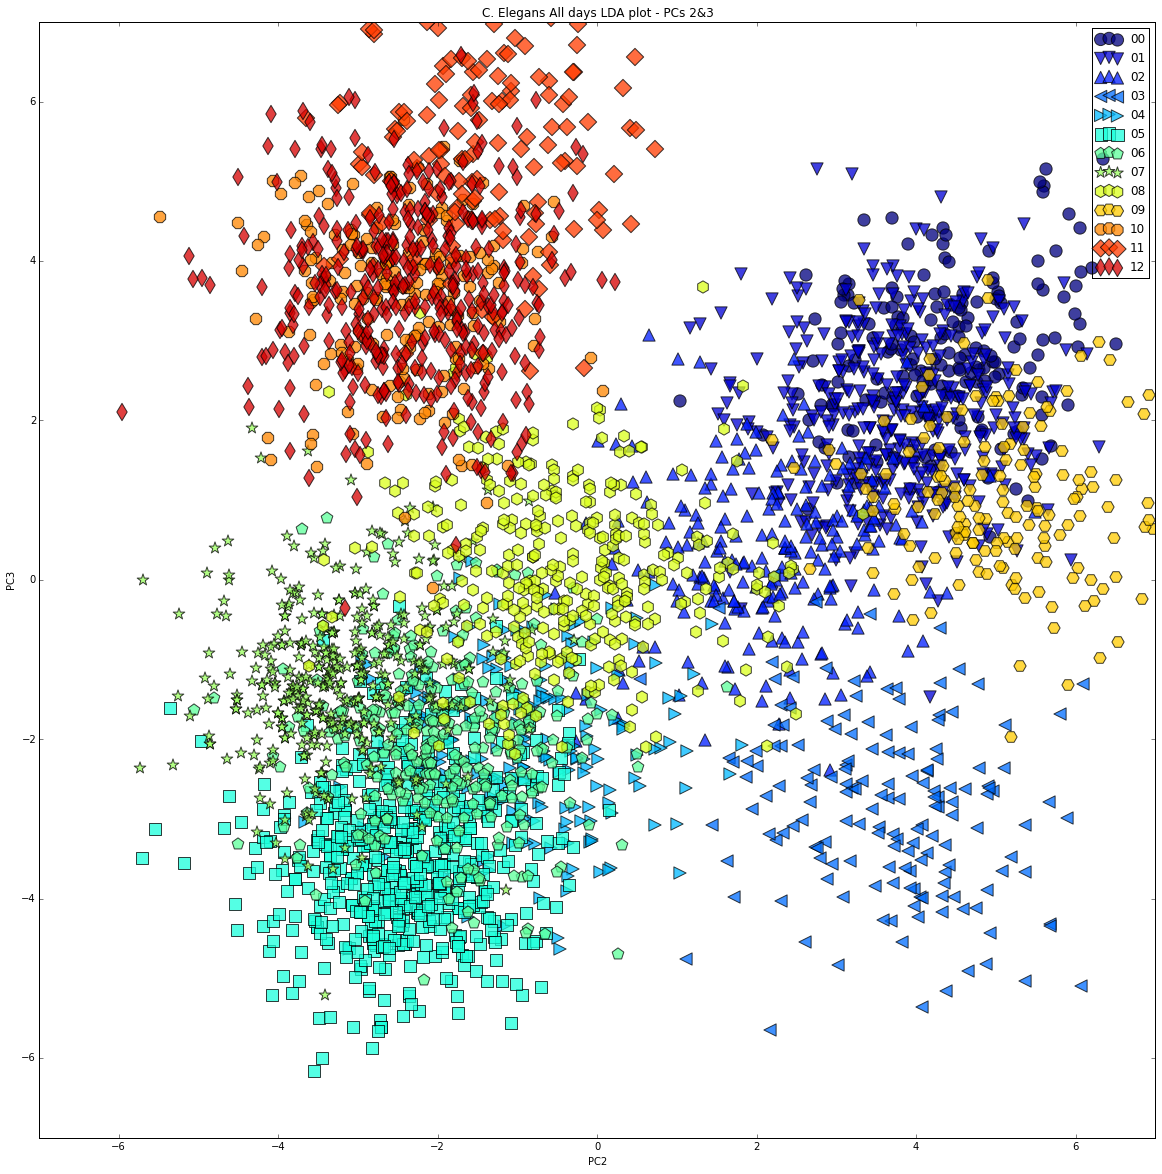

In [256]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim( ( -7, 7 ) )
ax.set_xlabel( 'PC2')
ax.set_ylim( ( -7, 7 ))
ax.set_ylabel( 'PC3')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_lda_featurespace[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 1], class_features[:, 2], c=color, label=label, marker=shape, s=150, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days LDA plot - PCs 2&3')
fig.show()

# Remove crazy samples from day 5

Maybe this improves LDA?

In [240]:
baddie_list = [ i for i, name in enumerate( age._contiguous_sample_names ) if 'pharynx' in name ]

In [241]:
len(baddie_list)

89

In [242]:
baddie_sg_list = [ sg for sg, name in zip( age._contiguous_sample_group_ids, age._contiguous_sample_names ) if 'pharynx' in name ]

In [243]:
len(baddie_sg_list)

89

In [244]:
baddie_sg_list == baddie_list

True

In [249]:
age

<FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit" n_features=2919 n_total_samples=3870 n_samples_per_group=1 n_classes=14 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 589, "06": 316, "07": 405, "08": 354, "09": 171, "10": 201, "11": 143, "12": 406, "13": 71)>

In [247]:
age2 = age.SampleReduce(None, baddie_list)

SAMPLE REDUCED FEATURE SPACE:  <FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit (subset)" n_features=2919 n_total_samples=3781 n_samples_per_group=1 n_classes=14 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 500, "06": 316, "07": 405, "08": 354, "09": 171, "10": 201, "11": 143, "12": 406, "13": 71)>


In [260]:
all_lda_fitter2 = LDA()
all_lda_fitter2.fit( age2.data_matrix, age2._contiguous_ground_truth_labels )
all_lda_featurespace2 = all_lda_fitter2.transform( age2.data_matrix )

In [262]:
[ _.max() - _.min() for _ in all_lda_featurespace2.T ]

[28.342297360057778,
 24.888047527720271,
 16.447546346290046,
 18.719695736991827,
 15.335848302119359,
 14.166123198597043,
 15.71655135369471,
 13.199869044337373,
 13.702654086866524,
 11.289177767559867,
 12.012975487756869,
 11.440603919174794,
 11.415570049993004,
 5.6409582323876144]

In [270]:
[ _.std() for _ in all_lda_featurespace2.T ]

[4.3905732804393525,
 3.6731431015912666,
 3.019321553877071,
 2.6292156701829774,
 2.3110328703923959,
 2.14571991786877,
 2.0444483479741722,
 1.8793866409370166,
 1.9698309800660689,
 1.8920371233071234,
 1.8499362308800587,
 1.7790647070354244,
 1.7440449329881129,
 0.9971335947216361]

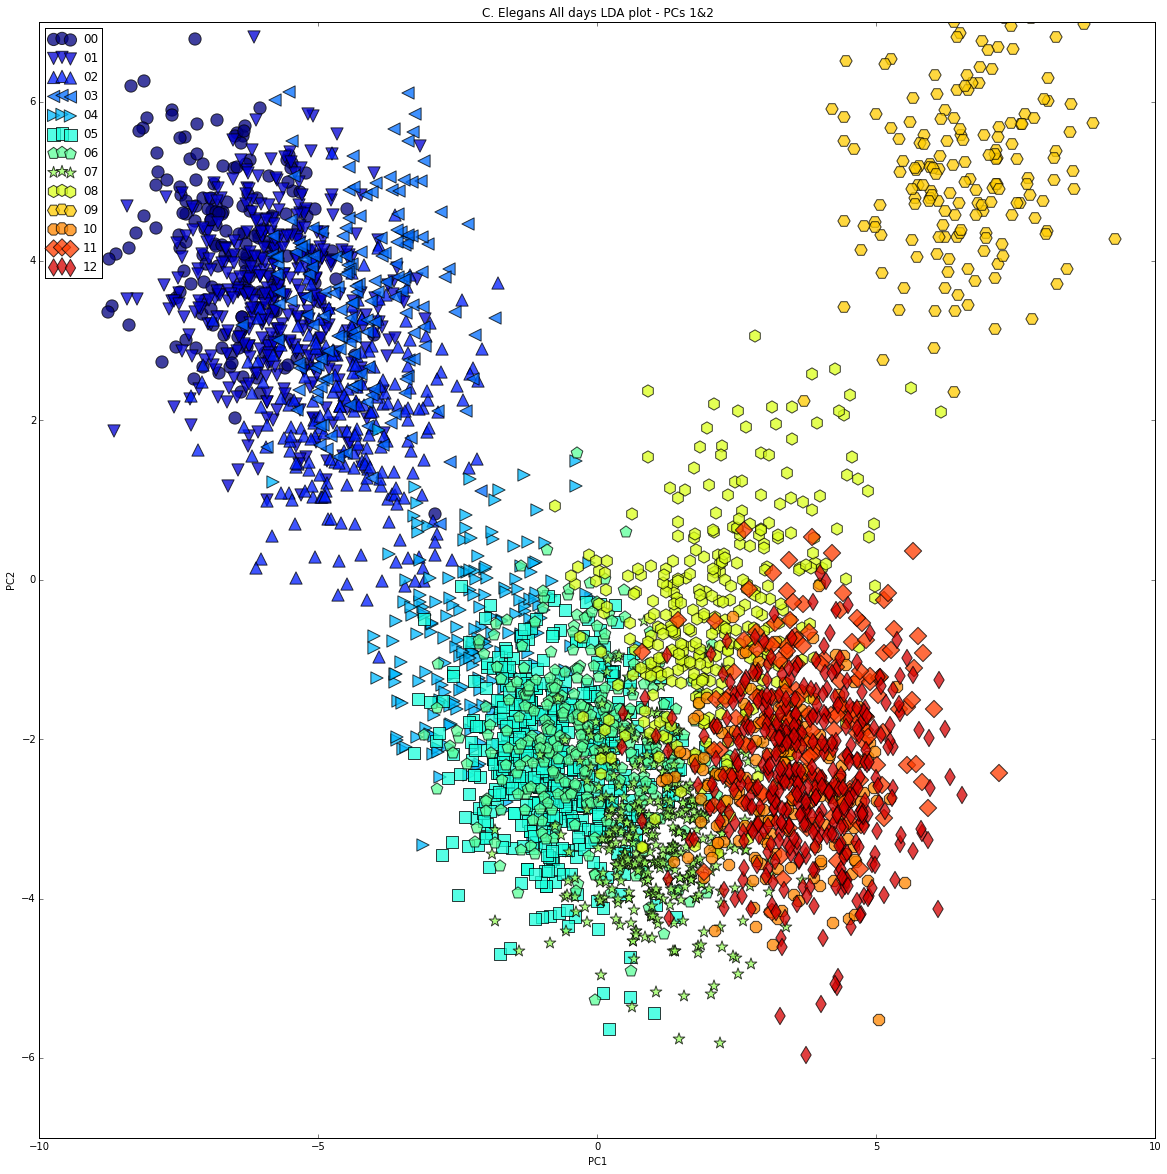

In [269]:
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_xlim( ( all_lda_featurespace2[:,0].min(), all_lda_featurespace2[:,0].max()*1.5 ) )
ax.set_xlim( ( -10, 10 ) )
ax.set_xlabel( 'PC1')
#ax.set_ylim( ( all_lda_featurespace2[:,1].min(), all_lda_featurespace2[:,1].max()*1.5 ))
ax.set_ylim( ( -7, 7 ) )
ax.set_ylabel( 'PC2')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age2._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_lda_featurespace2[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=label, marker=shape, s=150, alpha=0.75)
ax.legend(loc=2)
ax.set_title('C. Elegans All days LDA plot - PCs 1&2')
fig.show()

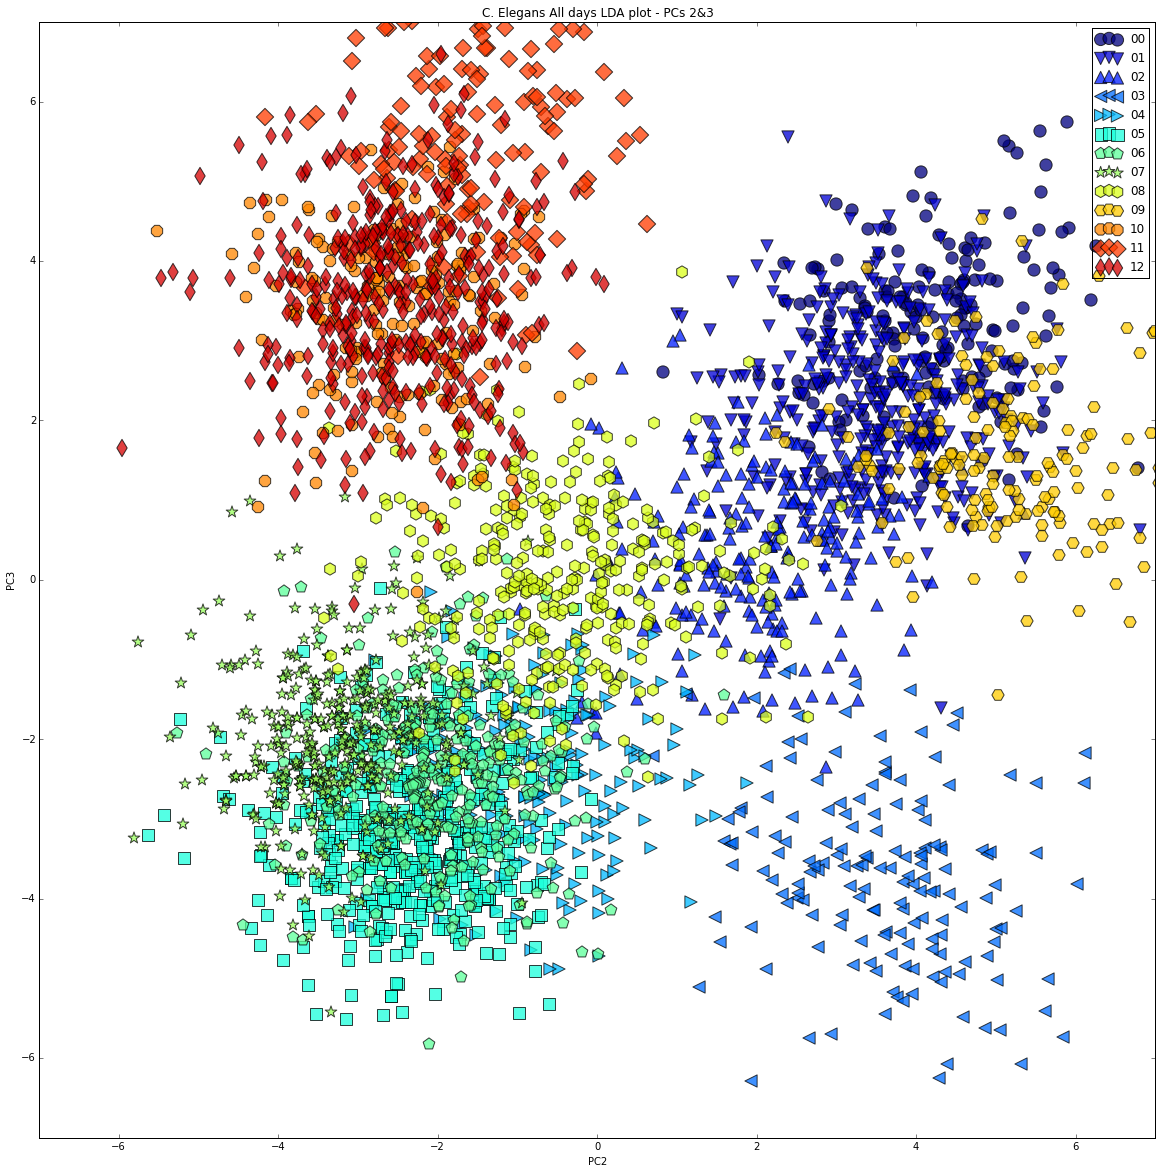

In [259]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim( ( -7, 7 ) )
ax.set_xlabel( 'PC2')
ax.set_ylim( ( -7, 7 ))
ax.set_ylabel( 'PC3')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    indices = np.where( [ gt == label for gt in age2._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_lda_featurespace2[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 1], class_features[:, 2], c=color, label=label, marker=shape, s=150, alpha=0.75)
ax.legend()
ax.set_title('C. Elegans All days LDA plot - PCs 2&3')
fig.show()

In [271]:
age2.ToFitFile('dme_c_elegans_lifeaspan_v3.2features_curated.fit')

# Remove entire class '09'

In [272]:
age3 = age2.RemoveClass('09')

REMOVED CLASS 09, RESULTANT FEATURE SPACE: <FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit (subset) (subset)" n_features=2919 n_total_samples=3610 n_samples_per_group=1 n_classes=13 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 500, "06": 316, "07": 405, "08": 354, "10": 201, "11": 143, "12": 406, "13": 71)>


In [273]:
age3.ToFitFile('dme_c_elegans_lifeaspan_v3.2features_curated2.fit')

In [276]:
all_lda_fitter3 = LDA()
all_lda_fitter3.fit( age3.data_matrix, age3._contiguous_ground_truth_labels )
all_lda_featurespace3 = all_lda_fitter3.transform( age3.data_matrix )

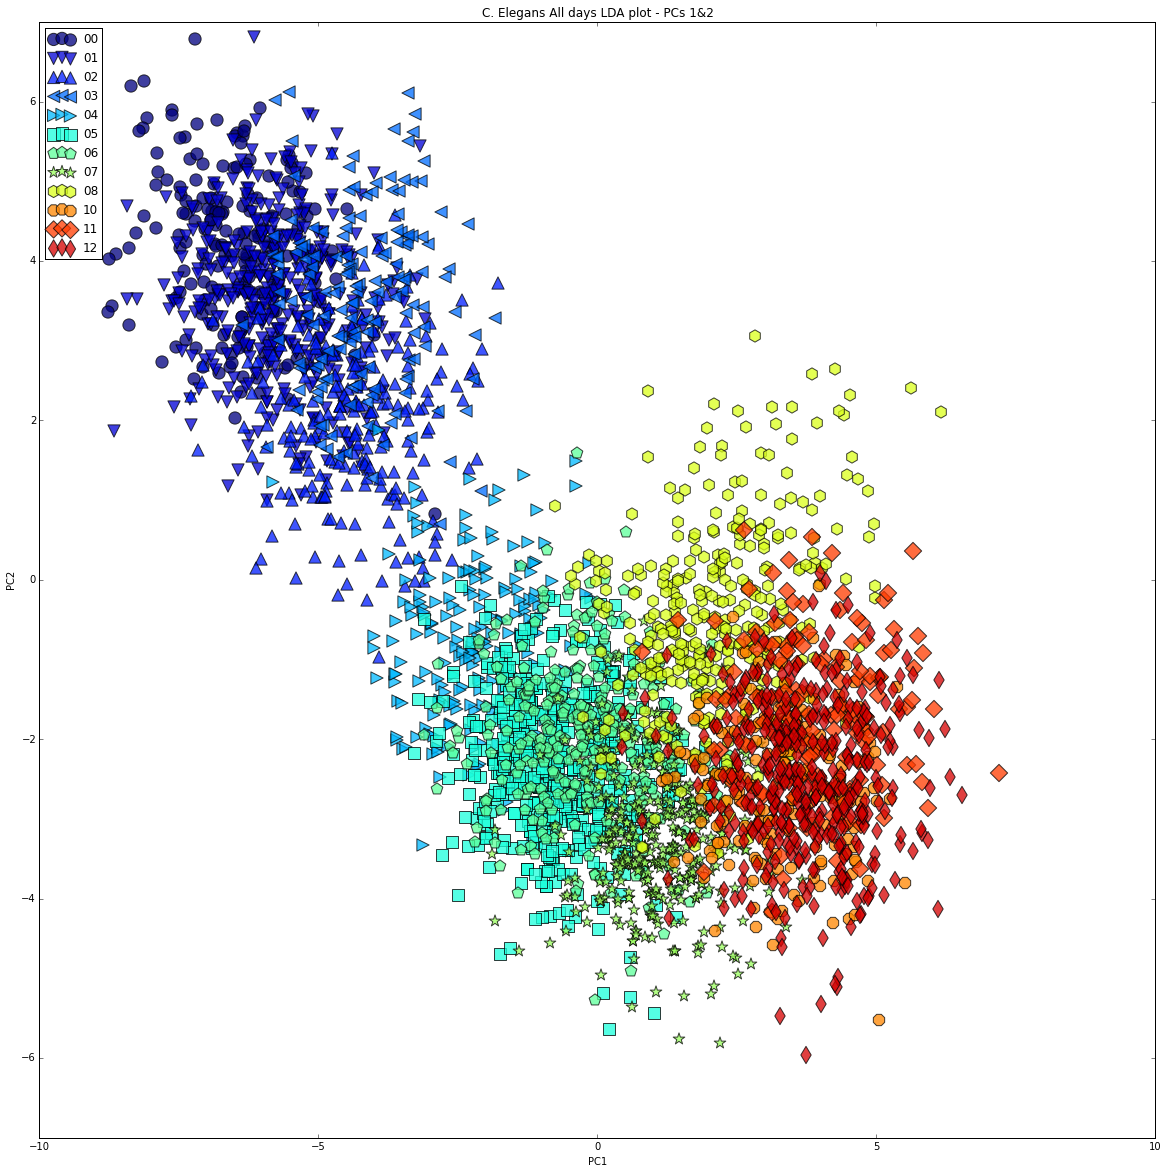

In [277]:
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_xlim( ( all_lda_featurespace2[:,0].min(), all_lda_featurespace2[:,0].max()*1.5 ) )
ax.set_xlim( ( -10, 10 ) )
ax.set_xlabel( 'PC1')
#ax.set_ylim( ( all_lda_featurespace2[:,1].min(), all_lda_featurespace2[:,1].max()*1.5 ))
ax.set_ylim( ( -7, 7 ) )
ax.set_ylabel( 'PC2')

for label, color, shape in zip( class_labels, class_colors, class_shapes ):
    if label == '09':
        continue
    indices = np.where( [ gt == label for gt in age2._contiguous_ground_truth_labels ] )
    #print "============================================\n", class_name
    #print indices
    class_features = all_lda_featurespace2[ indices ]
    #print class_features.shape
    ax.scatter( class_features[:, 0], class_features[:, 1], c=color, label=label, marker=shape, s=150, alpha=0.75)
ax.legend(loc=2)
ax.set_title('C. Elegans All days LDA plot - PCs 1&2')
fig.show()

# Remove class '13'

In [278]:
age4 = age3.RemoveClass('13')

REMOVED CLASS 13, RESULTANT FEATURE SPACE: <FeatureSpace "dme_c_elegans_lifeaspan_v3.2features.fit (subset) (subset) (subset)" n_features=2919 n_total_samples=3539 n_samples_per_group=1 n_classes=12 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 500, "06": 316, "07": 405, "08": 354, "10": 201, "11": 143, "12": 406)>


In [279]:
age4.ToFitFile('dme_c_elegans_lifeaspan_v3.2features_curated3.fit')

# Load C++ WND-CHARM results

In [4]:
from wndcharm.FeatureSpacePredictionExperiment import FeatureSpaceClassificationExperiment

In [2]:
exp = FeatureSpaceClassificationExperiment.NewFromHTMLReport('3.html')

In [3]:
exp

<FeatureSpaceClassificationExperiment #0 "3.html" n_splits=100 n_calls=21600 n_corr=9498 acc=43.97%>

In [4]:
exp.Print()

FeatureSpaceClassificationExperiment "3.html" (100 iterations)
9498/21600 correct = 43.97%
Confusion Matrix:
  	00	01	02	03	04	05	06	07	08	10	11	12	|	total	acc.
  	--	--	--	--	--	--	--	--	--	--	--	--	|	-----	----
00	909	350	56	136	122	25	94	28	28	30	6	16	|	1800	50.50%
01	297	795	252	54	86	23	53	145	54	13	14	14	|	1800	44.17%
02	88	244	855	20	64	262	93	21	105	21	1	26	|	1800	47.50%
03	256	79	3	1157	113	20	87	39	14	16	11	5	|	1800	64.28%
04	99	123	47	66	727	185	360	100	41	27	6	19	|	1800	40.39%
05	13	18	227	18	158	686	299	122	119	58	11	71	|	1800	38.11%
06	52	42	98	42	299	272	509	260	100	46	21	59	|	1800	28.28%
07	30	56	10	17	136	118	334	877	86	83	24	29	|	1800	48.72%
08	22	68	195	9	60	168	150	143	527	177	99	182	|	1800	29.28%
10	30	23	56	20	24	95	47	74	148	700	244	339	|	1800	38.89%
11	37	21	5	10	12	20	40	33	83	157	1109	273	|	1800	61.61%
12	43	44	18	5	25	55	69	59	141	323	371	647	|	1800	35.94%


Similarity Matrix:
  	00	01	02	03	04	05	06	07	08	10	11	12
  	--	--	--	--	--	--	--	--	--	--	--	--
00	1.

In [4]:
exp.PerSampleStatistics(print_indiv=False, output_filepath='dme_wnd_bagged-i53-j18-n100.tsv')

Saving output of function "PerSampleStatistics()" to file "dme_wnd_bagged-i53-j18-n100.tsv", mode "w"


In [5]:
exp.Print()

FeatureSpaceClassificationExperiment "3.html" (100 iterations)
9498/21600 correct = 43.97%
Confusion Matrix:
  	00	01	02	03	04	05	06	07	08	10	11	12	|	total	acc.
  	--	--	--	--	--	--	--	--	--	--	--	--	|	-----	----
00	909	350	56	136	122	25	94	28	28	30	6	16	|	1800	50.50%
01	297	795	252	54	86	23	53	145	54	13	14	14	|	1800	44.17%
02	88	244	855	20	64	262	93	21	105	21	1	26	|	1800	47.50%
03	256	79	3	1157	113	20	87	39	14	16	11	5	|	1800	64.28%
04	99	123	47	66	727	185	360	100	41	27	6	19	|	1800	40.39%
05	13	18	227	18	158	686	299	122	119	58	11	71	|	1800	38.11%
06	52	42	98	42	299	272	509	260	100	46	21	59	|	1800	28.28%
07	30	56	10	17	136	118	334	877	86	83	24	29	|	1800	48.72%
08	22	68	195	9	60	168	150	143	527	177	99	182	|	1800	29.28%
10	30	23	56	20	24	95	47	74	148	700	244	339	|	1800	38.89%
11	37	21	5	10	12	20	40	33	83	157	1109	273	|	1800	61.61%
12	43	44	18	5	25	55	69	59	141	323	371	647	|	1800	35.94%


Similarity Matrix:
  	00	01	02	03	04	05	06	07	08	10	11	12
  	--	--	--	--	--	--	--	--	--	--	--	--
00	1.

In [1]:
from wndcharm.FeatureSpace import FeatureSpace

In [2]:
age = FeatureSpace.NewFromFitFile('dme_c_elegans_lifeaspan_v3.2features_curated3.fit' )

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE dme_c_elegans_lifeaspan_v3.2features_curated3.fit: <FeatureSpace "dme_c_elegans_lifeaspan_v3.2features_curated3.fit" n_features=2919 n_total_samples=3539 n_samples_per_group=1 n_classes=12 samples_per_class=("00": 180, "01": 412, "02": 240, "03": 167, "04": 215, "05": 500, "06": 316, "07": 405, "08": 354, "10": 201, "11": 143, "12": 406)>


In [ ]:
exp_n1000 = FeatureSpaceClassificationExperiment.NewShuffleSplit( age, n_iter=1000, quiet=True )

In [1]:
from wndcharm.visualization import PredictedValuesGraph

In [2]:
graph = PredictedValuesGraph.NewFromHTMLReport( '3.html' )

In [3]:
%matplotlib inline

Rendering kernel-smoothed probability density estimate graph


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


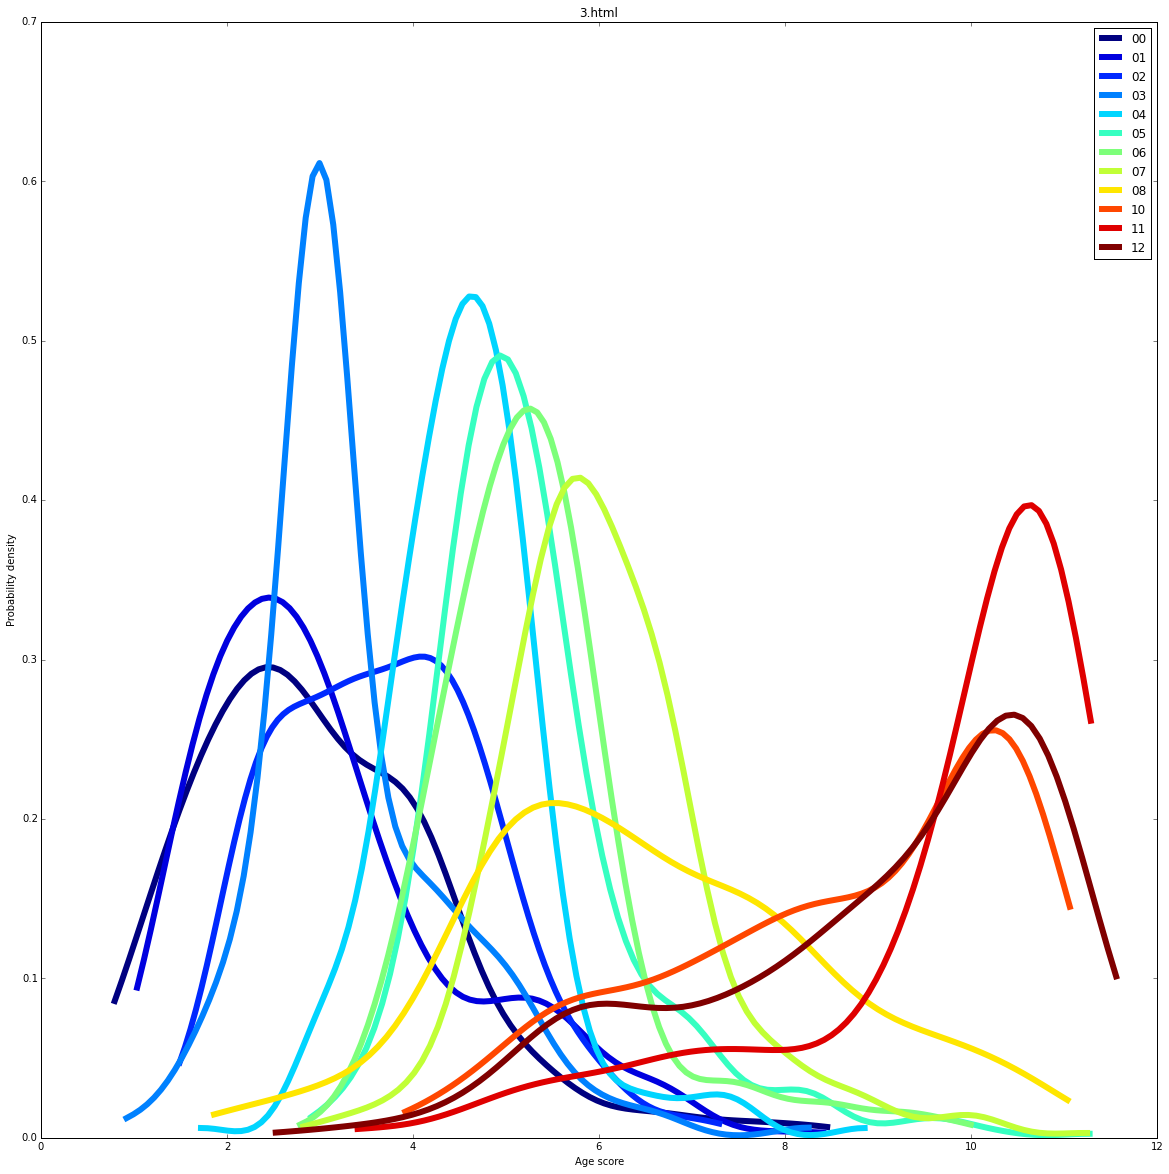

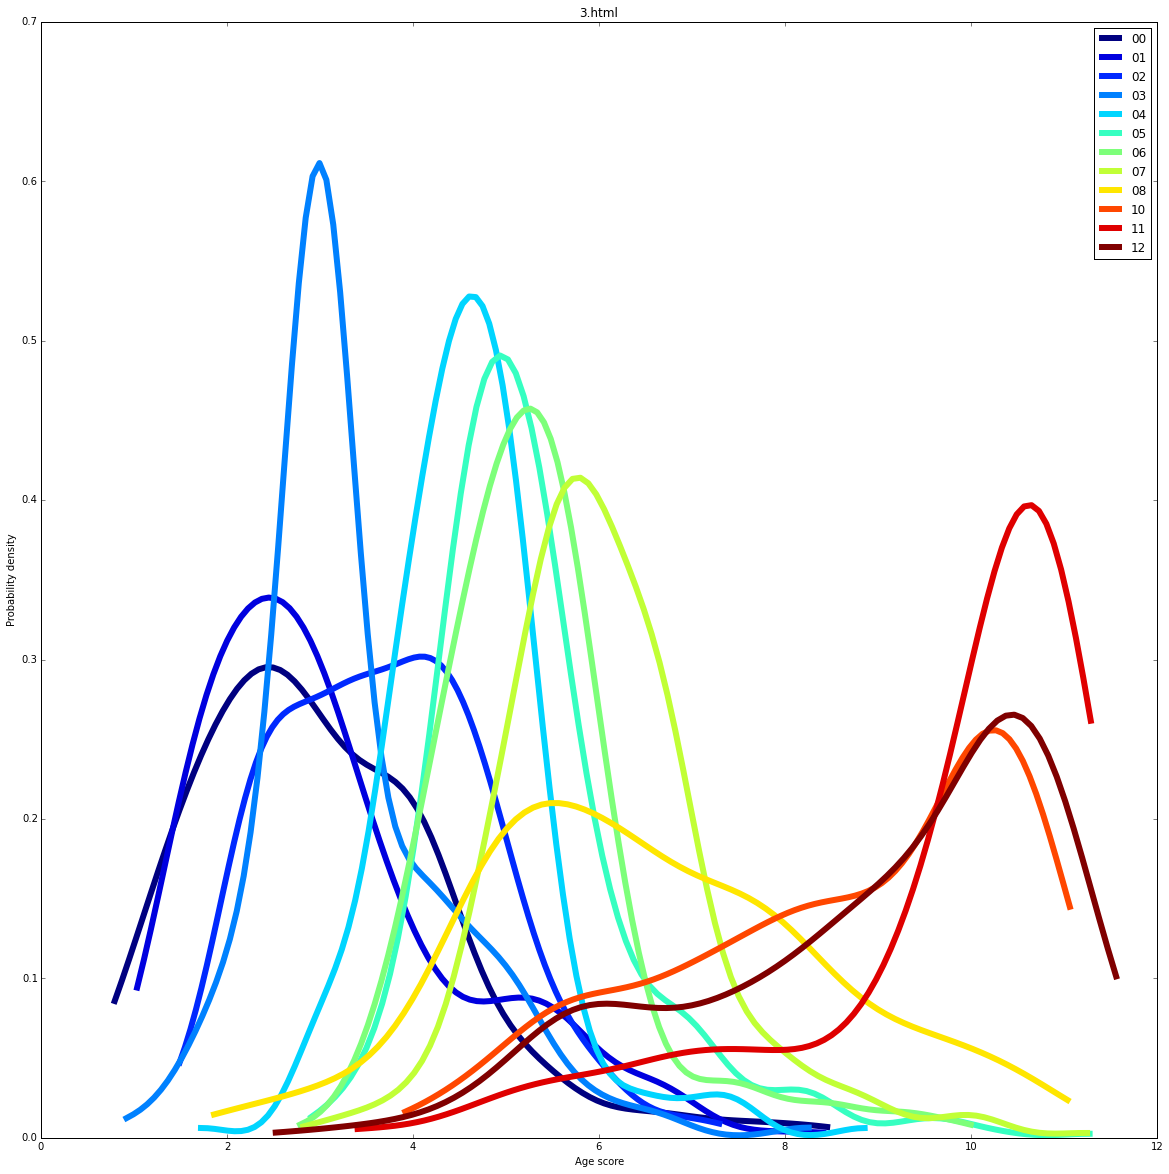

In [4]:
graph.KernelSmoothedDensityGraph()

Rendering rank-ordered predicted values graph


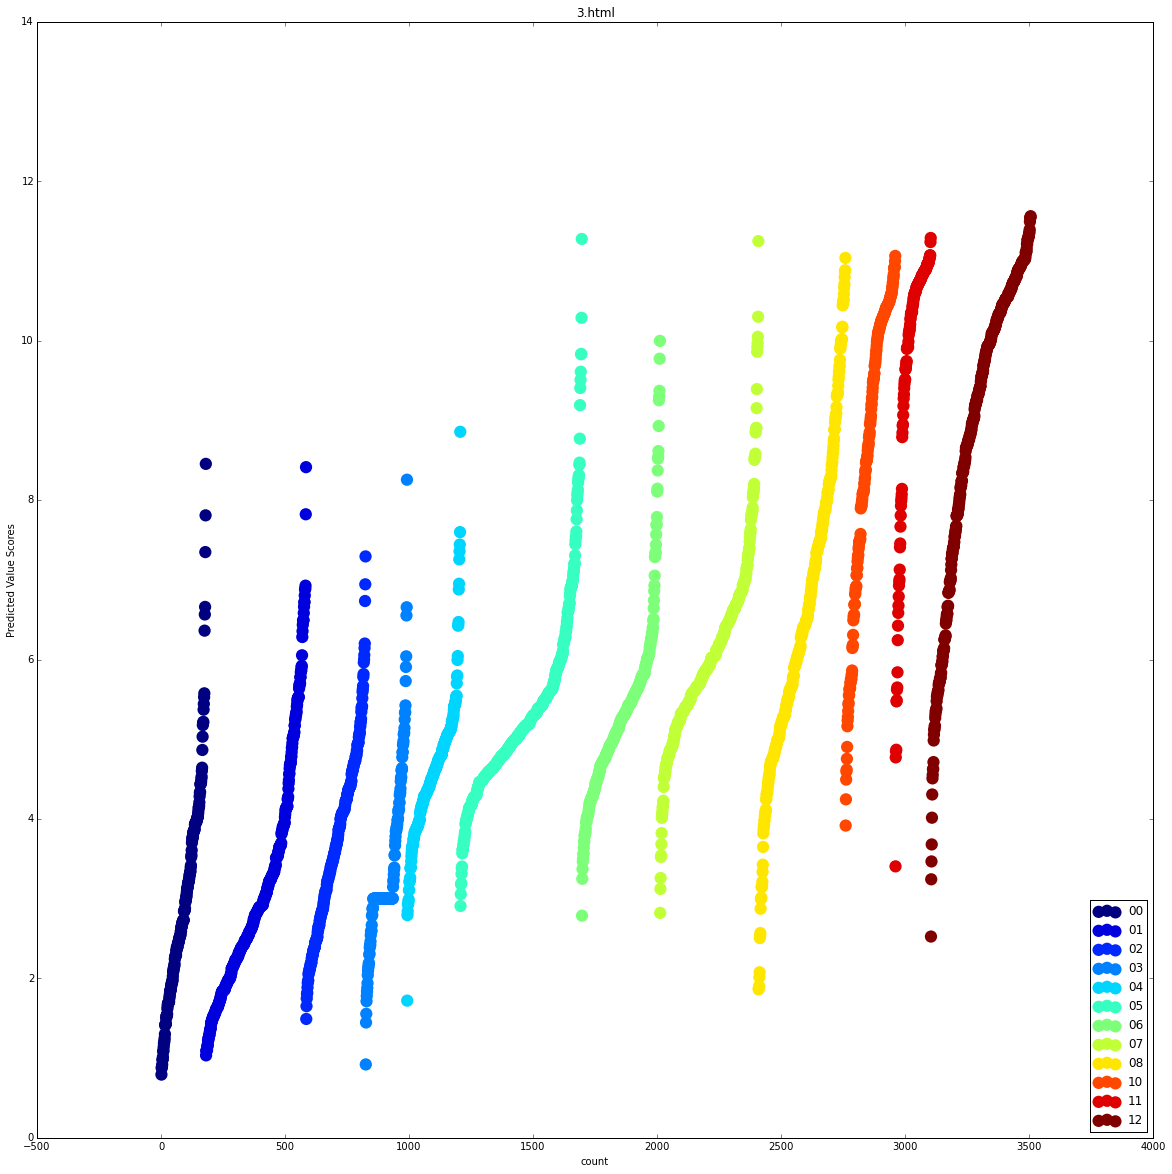

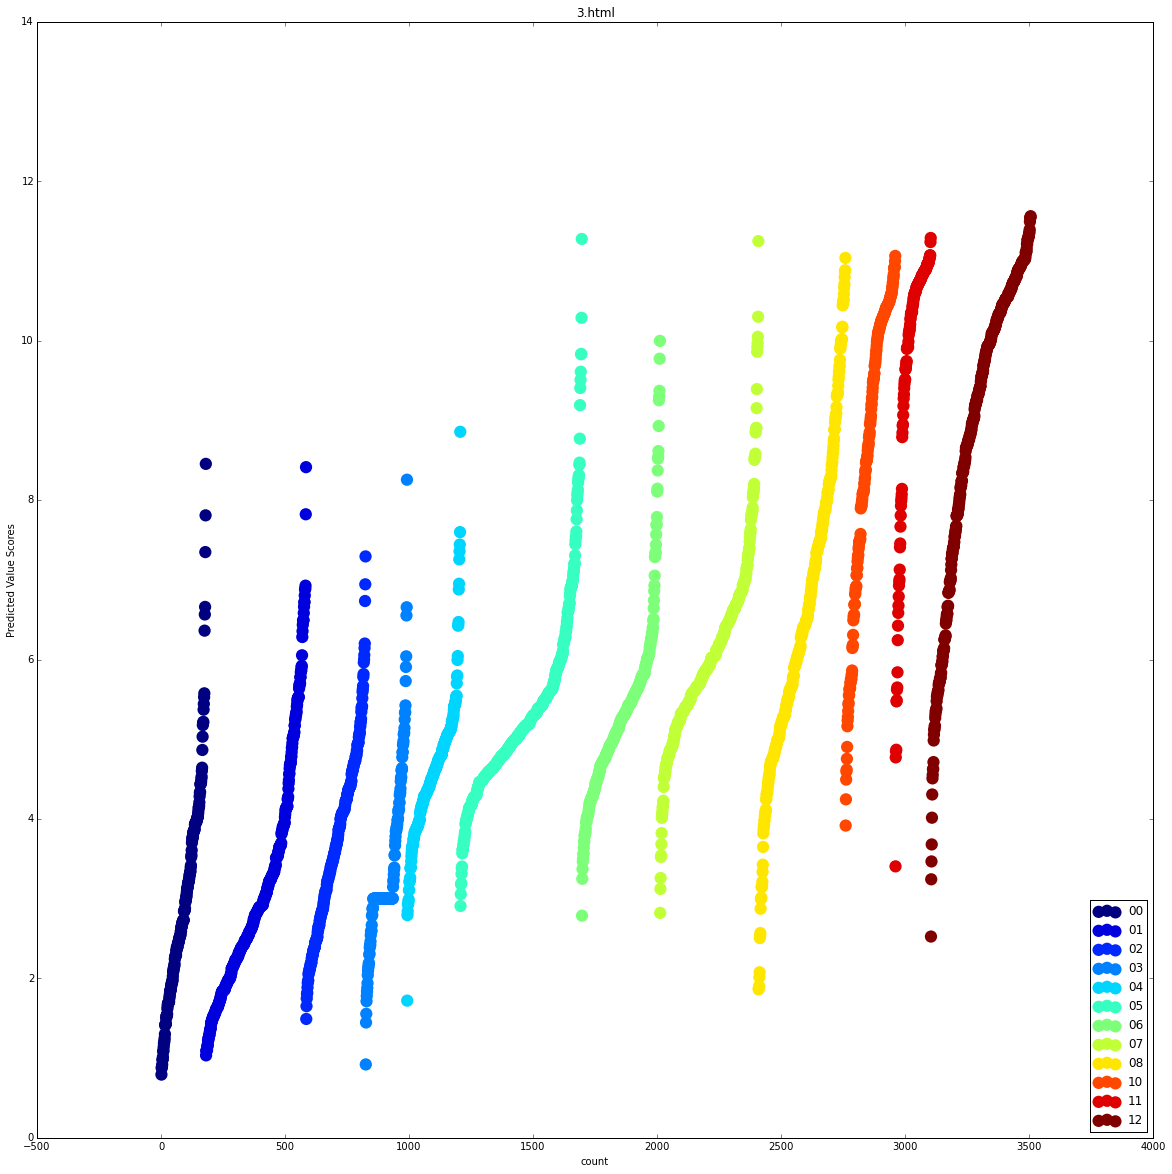

In [5]:
graph.RankOrderedPredictedValuesGraph()

# Do WND-CHARM Analysis on LDA featurespace

In [16]:
def foo():
    #global var
    var = 42
    def bar():
        global var
        var = 56
        print "barvar", var
        
    bar()
    print "foovar", var

In [17]:
foo()

barvar 56
foovar 42
